In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imported all the necessary libraries needed for EDA of these datasets

In [ ]:
#reading csv files
dropout=pd.read_csv("/content/drive/MyDrive/Data Gov in/dropout-ratio-2012-2015.csv",parse_dates=['year'],index_col='year')
enroll=pd.read_csv("/content/drive/MyDrive/Data Gov in/gross-enrollment-ratio-2013-2016.csv")
computers=pd.read_csv("/content/drive/MyDrive/Data Gov in/percentage-of-schools-with-comps-2013-2016.csv")
electricity=pd.read_csv("/content/drive/MyDrive/Data Gov in/percentage-of-schools-with-electricity-2013-2016.csv")
water=pd.read_csv("/content/drive/MyDrive/Data Gov in/percentage-of-schools-with-water-facility-2013-2016.csv")
boys_toilet=pd.read_csv("/content/drive/MyDrive/Data Gov in/schools-with-boys-toilet-2013-2016.csv")
girls_toilet=pd.read_csv("/content/drive/MyDrive/Data Gov in/schools-with-girls-toilet-2013-2016.csv")

<ipython-input-3-c6c616fc1117>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dropout=pd.read_csv("/content/drive/MyDrive/Data Gov in/dropout-ratio-2012-2015.csv",parse_dates=['year'],index_col='year')


**Knowing about dataset**

**1. Dropout Analysis**

In [ ]:
dropout.head()

,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
year,,,,,,,,,,,,,
2012-13,A & N Islands,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
2013-14,A & N Islands,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2014-15,A & N Islands,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
2012-13,Andhra Pradesh,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
2013-14,Andhra Pradesh,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79



*   **Data Preprocessing**



In [ ]:
col= ['Primary_Boys','Primary_Girls','Primary_Total','Upper Primary_Boys','Upper Primary_Girls','Upper Primary_Total','Secondary _Boys','Secondary _Girls','Secondary _Total','HrSecondary_Boys','HrSecondary_Girls','HrSecondary_Total']
dropout[col]= dropout[col].replace('NR',np.nan)
dropout[col]= dropout[col].replace('Uppe_r_Primary',np.nan).astype(float)
dropout.head()


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
year,,,,,,,,,,,,,
2012-13,A & N Islands,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
2013-14,A & N Islands,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87
2014-15,A & N Islands,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
2012-13,Andhra Pradesh,3.30,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35
2013-14,Andhra Pradesh,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


Replaced "NR" value and "Uppe_r_Primary" to NaN

In [ ]:
dropout.keys()

Index(['State_UT', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'],
      dtype='object')

In [ ]:
dropout['State_UT'] = dropout.State_UT.str.replace(' +', ' ')
dropout['State_UT'] = dropout.State_UT.str.replace('A & N Islands', 'Andaman and Nicobar Islands')
dropout['State_UT'] = dropout.State_UT.str.replace('&', 'and')

print('Number of Indian States & Union Territories: ', dropout.State_UT.nunique())
print('List of Indian States:\n', dropout.State_UT.unique())

Number of Indian States & Union Territories:  40
List of Indian States:
 ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal  Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli' 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Lakshadweep' 'Madhya  Pradesh' 'Madhya Pradesh' 'Maharashtra'
 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil  Nadu' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'All India']


Replaced multiple spaces with 1 space for Indian States,
Updated shortened version of a state to its full name,
Updated ampersand to the word 'and',
Printed the unique state names.


In [ ]:
dropout.isna().sum()

State_UT                0
Primary_Boys           15
Primary_Girls          15
Primary_Total          17
Upper Primary_Boys     17
Upper Primary_Girls     8
Upper Primary_Total     9
Secondary _Boys         4
Secondary _Girls        4
Secondary _Total        4
HrSecondary_Boys       28
HrSecondary_Girls      34
HrSecondary_Total      31
dtype: int64

Total number of NaN values

In [ ]:
dropout.dtypes

State_UT                object
Primary_Boys           float64
Primary_Girls          float64
Primary_Total          float64
Upper Primary_Boys     float64
Upper Primary_Girls    float64
Upper Primary_Total    float64
Secondary _Boys        float64
Secondary _Girls       float64
Secondary _Total       float64
HrSecondary_Boys       float64
HrSecondary_Girls      float64
HrSecondary_Total      float64
dtype: object

In [ ]:
dropout['Primary_Total'] = pd.to_numeric(dropout['Primary_Total'], errors='coerce')

Removed all the missing and garbage values and replaced it with NAN Changed all the data to float

In [ ]:
dropout.describe(include='all')

,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
count,110,95.000000,95.000000,93.000000,93.000000,102.000000,101.000000,106.000000,106.000000,106.000000,82.000000,76.000000,79.000000
unique,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Andaman and Nicobar Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.971368,4.644105,4.908602,4.236667,4.496471,4.181089,17.809906,16.926981,17.393868,9.347317,7.206974,8.296329
std,NaN,4.683392,4.590296,4.617200,3.286495,3.364940,3.285638,8.435483,9.015808,8.609419,7.160002,5.213958,6.135895
min,NaN,0.000000,0.260000,0.200000,0.010000,0.000000,0.070000,5.570000,4.210000,5.320000,0.230000,0.300000,0.350000
25%,NaN,1.350000,1.120000,1.290000,2.370000,2.242500,1.790000,11.740000,9.832500,10.587500,3.097500,3.685000,3.375000
50%,NaN,3.630000,3.250000,3.580000,3.490000,3.855000,3.800000,16.340000,15.290000,15.445000,8.290000,5.850000,7.640000
75%,NaN,7.000000,6.635000,6.790000,5.630000,6.122500,5.550000,23.342500,22.540000,23.345000,13.422500,9.715000,11.520000


In [ ]:
dropout

,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
year,,,,,,,,,,,,,
2012-13,Andaman and Nicobar Islands,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
2013-14,Andaman and Nicobar Islands,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87
2014-15,Andaman and Nicobar Islands,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
2012-13,Andhra Pradesh,3.30,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35
2013-14,Andhra Pradesh,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-14,West Bengal,3.44,2.37,2.91,5.63,3.10,4.31,16.73,19.77,18.34,8.03,7.76,7.90
2014-15,West Bengal,2.13,0.79,1.47,5.84,2.88,4.30,16.33,19.06,17.80,8.18,8.04,8.11
2012-13,All India,4.68,4.66,4.67,2.30,4.01,3.13,14.54,14.54,14.54,NaN,NaN,NaN


**Chi Square Test**




In [ ]:
contingency_table = pd.crosstab(dropout['Primary_Boys'], dropout['Primary_Girls'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"p-value: {p_value:.4f}")
print(dof)

Chi-square statistic: 7544.63
p-value: 0.0980
7387


In [ ]:
states={}
for state_name in dropout['State_UT'].unique():
    State_UT = dropout.query(f'State_UT== "{state_name}"').copy()
    col= State_UT.isna().sum()[State_UT.isna().sum()>0].index
    State_UT[col]= State_UT[col].fillna(State_UT[col].mean())
    states[str(state_name)]= State_UT

print(states.keys())

dict_keys(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal  Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya  Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil  Nadu', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'All India'])


In [ ]:
means={}
for state_name in states.keys():
    State_UT = states[state_name]

    State_UT['mean']= State_UT.mean(axis=1, numeric_only=True)

    State_UT['mean'] = State_UT['mean'].astype(float)

    means[str(state_name)]= (State_UT['mean'].sum())


Calculating the mean of dropout rates in each individual state in all three sessions.(12-13,13-14,14-15)

In [ ]:
for State_UT in states.keys():
    display(states[State_UT])

,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Andaman and Nicobar Islands,0.83,0.51,0.68,1.44,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.367500
2013-14,Andaman and Nicobar Islands,1.35,1.06,1.21,1.44,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87,6.305000
2014-15,Andaman and Nicobar Islands,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.191667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Andhra Pradesh,3.30,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.660,10.85,0.35,5.970833
2013-14,Andhra Pradesh,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.650,10.85,11.79,8.139167
2014-15,Andhra Pradesh,6.57,6.89,6.72,5.09,5.32,5.20,15.81,15.60,15.71,7.655,10.85,6.07,8.957083


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2013-14,Arunachal Pradesh,11.54,10.22,10.89,4.44,6.74,5.59,16.08,12.75,14.49,18.57,15.49,17.07,11.989167


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Arunachal Pradesh,15.84,14.44,15.16,5.86,9.06,7.47,13.99,11.77,12.93,7.85,2.14,5.11,10.135
2014-15,Arunachal Pradesh,11.51,10.09,10.82,5.31,8.08,6.71,18.33,15.81,17.11,19.37,17.44,18.42,13.250


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Assam,7.02,5.46,6.24,7.89,6.55,7.20,25.65,27.79,26.77,4.870,4.500,4.690,11.219167
2013-14,Assam,8.19,6.68,7.44,7.60,6.54,7.05,28.59,32.10,30.43,7.620,6.830,7.240,13.025833
2014-15,Assam,16.07,14.65,15.36,10.45,10.56,10.51,24.64,29.28,27.06,6.245,5.665,5.965,14.704583


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Bihar,1.365,1.79,2.09,3.455,3.60,3.53,29.11,31.28,30.14,NaN,NaN,NaN,11.817778
2013-14,Bihar,2.380,1.79,2.09,2.770,3.19,2.98,24.67,26.05,25.33,NaN,NaN,NaN,10.138889
2014-15,Bihar,0.350,1.79,2.09,4.140,4.01,4.08,25.21,26.62,25.90,NaN,NaN,NaN,10.465556


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Chandigarh,NaN,NaN,NaN,0.365,0.88,0.10,NaN,NaN,NaN,16.32,10.09,13.65,6.900833
2013-14,Chandigarh,NaN,NaN,NaN,0.720,1.55,1.08,NaN,NaN,NaN,13.24,8.49,11.28,6.060000
2014-15,Chandigarh,NaN,NaN,NaN,0.010,0.96,0.44,NaN,NaN,NaN,12.10,8.41,10.55,5.411667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Chhattisgarh,4.24,4.05,4.14,6.09,4.73,5.42,14.82,14.89,14.86,1.37,3.135,2.76,6.708750
2013-14,Chhattisgarh,1.45,1.38,1.42,4.09,3.51,3.80,24.10,22.72,23.41,1.37,2.130,2.76,7.678333
2014-15,Chhattisgarh,3.08,2.74,2.91,6.47,5.22,5.85,22.62,19.92,21.26,1.37,4.140,2.76,8.195000


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Dadra and Nagar Haveli,1.325,0.47,1.52,2.59,4.30,3.38,26.34,22.00,24.41,13.34,4.81,9.65,9.511250
2013-14,Dadra and Nagar Haveli,1.050,2.17,1.57,3.31,5.09,4.13,30.02,26.83,28.59,7.07,5.33,6.24,10.116667
2014-15,Dadra and Nagar Haveli,1.600,1.31,1.47,3.70,4.40,4.02,18.19,15.08,16.77,13.45,4.77,9.47,7.852500


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Daman and Diu,1.43,0.44,0.98,3.28,3.395,3.335,10.84,12.25,11.52,6.21,20.47,1.26,6.284167
2013-14,Daman and Diu,1.06,0.59,0.85,3.42,3.720,3.560,19.46,20.33,19.86,14.48,4.89,9.86,8.506667
2014-15,Daman and Diu,1.80,0.29,1.11,3.14,3.070,3.110,34.45,29.73,32.27,44.38,36.05,40.48,19.156667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Delhi,NaN,NaN,NaN,2.04,0.31,1.77,6.26,4.21,5.32,18.56,9.60,14.47,6.948889
2013-14,Delhi,NaN,NaN,NaN,3.13,2.37,2.78,10.80,6.64,8.90,20.28,11.45,16.25,9.177778
2014-15,Delhi,NaN,NaN,NaN,0.95,0.55,0.76,13.55,9.80,11.81,20.91,13.15,17.32,9.866667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Goa,0.355,0.26,0.465,NaN,0.21,0.07,9.49,6.26,7.96,16.01,5.80,11.26,5.285455
2013-14,Goa,0.080,0.33,0.200,NaN,0.21,0.07,11.68,7.19,9.58,18.21,8.38,13.36,6.299091
2014-15,Goa,0.630,0.84,0.730,NaN,0.21,0.07,14.15,7.68,11.15,18.27,9.39,13.91,7.002727


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Gujarat,0.21,1.35,0.74,2.75,8.19,5.20,13.96,12.95,13.55,0.58,0.30,0.46,5.020000
2013-14,Gujarat,0.50,1.06,0.76,3.52,8.04,5.55,22.85,19.81,21.61,9.06,6.18,7.83,8.897500
2014-15,Gujarat,0.82,0.98,0.89,4.65,8.54,6.41,26.29,23.24,25.04,8.40,5.26,7.04,9.796667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Haryana,1.48,1.06,1.29,0.18,0.80,0.46,8.22,9.93,8.98,3.825,4.14,3.965,3.694167
2013-14,Haryana,0.22,0.63,0.41,1.97,3.25,2.55,11.92,13.27,12.51,1.410,3.16,2.180,4.456667
2014-15,Haryana,5.54,5.69,5.61,5.50,6.18,5.81,16.35,15.30,15.89,6.240,5.12,5.750,8.248333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Himachal Pradesh,0.51,0.39,0.45,0.52,0.49,0.51,8.35,8.40,8.37,10.25,7.64,9.02,4.575000
2013-14,Himachal Pradesh,0.57,0.34,0.46,0.60,0.98,0.78,9.32,8.83,9.09,8.44,5.54,7.07,4.335000
2014-15,Himachal Pradesh,0.46,0.83,0.64,0.50,1.27,0.87,6.31,5.80,6.07,9.02,5.57,7.41,3.729167


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Jammu and Kashmir,6.80,5.75,6.30,5.51,5.52,5.52,16.79,17.96,17.33,11.69,9.36,10.66,9.9325
2013-14,Jammu and Kashmir,5.53,5.37,5.46,3.86,4.80,4.30,14.70,16.14,15.36,8.80,6.20,7.64,8.1800
2014-15,Jammu and Kashmir,6.98,6.59,6.79,4.98,5.95,5.44,16.97,17.65,17.28,13.85,11.20,12.65,10.5275


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Jharkhand,7.36,7.05,7.21,4.99,5.94,5.47,17.84,19.20,18.50,2.72,4.18,3.41,8.655833
2013-14,Jharkhand,6.89,5.91,6.41,7.19,7.65,7.42,22.99,23.32,23.15,2.72,4.18,3.41,10.103333
2014-15,Jharkhand,5.91,5.03,5.48,9.01,8.96,8.99,23.45,24.56,24.00,2.72,4.18,3.41,10.475000


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Karnataka,3.40,2.51,2.97,4.96,5.15,5.05,40.70,39.07,39.92,19.47,11.26,15.330,15.815833
2013-14,Karnataka,2.42,2.21,2.32,2.31,2.73,2.51,28.49,26.57,27.57,12.72,11.26,8.645,10.812917
2014-15,Karnataka,2.03,2.01,2.02,3.46,4.27,3.85,27.71,24.52,26.18,5.97,11.26,1.960,9.603333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Kerala,NaN,NaN,NaN,NaN,0.0,NaN,12.31,6.38,9.45,4.245,5.9,3.435,5.960000
2013-14,Kerala,NaN,NaN,NaN,NaN,0.0,NaN,17.30,11.40,14.46,6.950,5.9,6.400,8.915714
2014-15,Kerala,NaN,NaN,NaN,NaN,0.0,NaN,14.96,9.52,12.32,1.540,5.9,0.470,6.387143


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Lakshadweep,2.30,2.71,2.5,0.97,2.84,0.29,6.15,9.17,7.68,2.98,10.65,6.59,4.569167
2013-14,Lakshadweep,0.00,2.71,2.5,1.16,2.50,1.86,8.48,7.65,8.03,3.03,2.59,2.82,3.610833
2014-15,Lakshadweep,1.15,2.71,2.5,2.37,3.18,2.78,8.82,4.96,6.76,3.00,3.21,3.12,3.713333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Madhya Pradesh,5.75,6.49,6.11,6.79,10.27,8.53,11.16,16.39,13.63,NaN,NaN,NaN,9.457778


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2013-14,Madhya Pradesh,9.91,10.40,10.14,9.88,13.57,11.7,25.21,27.91,26.47,0.52,2.83,1.55,12.507500
2014-15,Madhya Pradesh,6.48,6.72,6.59,7.78,10.70,9.2,23.71,25.97,24.77,0.52,0.73,1.55,10.393333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Maharashtra,0.88,1.06,0.97,0.89,2.72,1.74,16.61,15.72,16.20,2.55,3.94,3.20,5.540000
2013-14,Maharashtra,0.51,0.59,0.55,0.89,1.50,0.61,15.04,13.78,14.47,2.85,3.89,3.34,4.835000
2014-15,Maharashtra,1.26,1.25,1.26,0.89,2.83,1.79,13.11,12.58,12.87,2.02,1.60,1.83,4.440833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Manipur,10.24,9.48,9.86,5.48,6.65,6.06,8.16,11.35,9.75,5.96,10.06,7.930,8.415000
2013-14,Manipur,17.27,18.74,18.00,7.48,6.54,7.02,12.35,15.28,13.81,3.30,3.08,3.200,10.505833
2014-15,Manipur,9.50,9.83,9.66,3.61,4.80,4.20,12.94,15.86,14.38,4.63,6.57,5.565,8.462083


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Meghalaya,11.32,8.96,10.14,8.43,7.34,7.85,27.21,25.02,26.03,NaN,NaN,NaN,14.700000
2013-14,Meghalaya,11.30,9.39,10.34,6.34,7.28,6.84,25.63,23.99,24.75,NaN,NaN,NaN,13.984444
2014-15,Meghalaya,10.35,8.56,9.46,6.77,6.30,6.52,20.80,20.27,20.52,NaN,NaN,NaN,12.172222


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Mizoram,24.27,23.93,24.11,19.35,19.21,19.28,22.18,20.65,21.42,2.910,4.85,6.91,17.422500
2013-14,Mizoram,12.57,13.38,12.96,6.61,5.39,6.02,20.00,17.37,18.70,5.955,4.85,6.91,10.892917
2014-15,Mizoram,10.17,10.03,10.10,5.46,4.06,4.78,23.02,20.73,21.88,9.000,4.85,6.91,10.915833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Nagaland,7.11,7.03,7.07,10.15,9.51,9.83,26.70,26.33,26.51,18.67,17.87,18.29,15.4225
2013-14,Nagaland,19.09,19.74,19.41,18.08,17.63,17.86,34.14,36.08,35.11,15.36,12.96,14.19,21.6375
2014-15,Nagaland,6.18,5.02,5.61,7.87,7.97,7.92,17.98,18.47,18.23,10.36,3.19,6.97,9.6475


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Odisha,3.63,3.49,3.56,4.10,3.52,3.81,50.09,49.62,49.86,NaN,NaN,NaN,19.075556
2013-14,Odisha,2.83,3.05,2.94,3.11,2.48,2.80,49.39,49.57,49.48,NaN,NaN,NaN,18.405556
2014-15,Odisha,2.91,2.81,2.86,4.11,3.49,3.81,29.74,29.37,29.56,NaN,NaN,NaN,12.073333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Puducherry,0.25,0.43,0.34,0.33,1.05,0.68,18.49,11.72,15.21,6.79,3.87,5.25,5.367500
2013-14,Puducherry,0.76,0.57,0.66,0.37,0.83,0.60,18.22,10.02,14.24,13.24,9.28,11.16,6.662500
2014-15,Puducherry,0.36,0.38,0.37,0.44,0.69,0.56,14.94,9.36,12.19,5.40,3.69,4.50,4.406667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Punjab,1.99,1.98,1.99,2.58,3.04,2.78,9.40,10.30,9.80,9.69,6.53,8.28,5.696667
2013-14,Punjab,1.35,1.21,1.29,2.52,3.27,2.85,8.93,8.71,8.83,7.87,3.20,5.81,4.653333
2014-15,Punjab,2.89,3.25,3.05,2.95,3.55,3.22,9.22,8.39,8.86,7.52,3.67,5.83,5.200000


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Rajasthan,7.20,8.85,7.97,2.86,6.34,4.42,13.06,14.49,13.65,NaN,NaN,NaN,8.760000
2013-14,Rajasthan,7.76,9.12,8.39,4.49,7.95,6.03,17.85,20.06,18.77,NaN,NaN,NaN,11.157778
2014-15,Rajasthan,5.02,5.02,5.02,2.54,3.73,3.07,13.54,13.40,13.48,NaN,NaN,NaN,7.202222


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Sikkim,4.78,2.31,3.60,2.60,3.64,3.15,9.93,8.64,9.23,11.79,4.92,8.10,6.057500
2013-14,Sikkim,5.55,3.49,4.57,6.35,3.98,5.14,13.74,12.14,12.89,14.11,11.92,12.91,8.899167
2014-15,Sikkim,3.75,0.62,2.27,2.07,1.08,1.57,17.58,14.39,15.89,12.48,11.17,11.76,7.885833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Tamil Nadu,4.02,4.1,4.06,0.38,2.13,1.24,14.26,5.86,10.2,1.34,2.33,1.87,4.315833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2013-14,Tamil Nadu,0.53,0.39,0.46,4.38,4.67,4.52,16.13,7.99,12.2,4.55,4.35,4.44,5.384167
2014-15,Tamil Nadu,0.53,0.39,0.46,4.38,4.67,4.52,11.67,4.36,8.1,4.59,2.34,3.41,4.118333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2013-14,Telangana,6.04,5.57,5.81,4.63,4.79,4.71,17.99,16.86,17.43,13.67,13.2,13.43,10.344167
2014-15,Telangana,2.21,1.94,2.08,2.43,2.17,2.30,16.54,14.50,15.53,2.06,13.2,0.77,6.310833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Tripura,2.31,2.11,2.22,3.10,3.07,3.08,24.09,26.99,25.50,8.40,9.49,8.87,9.935833
2013-14,Tripura,3.63,3.52,3.58,3.21,2.20,2.72,24.51,25.70,25.09,9.15,9.06,9.11,10.123333
2014-15,Tripura,1.37,1.19,1.28,2.37,1.61,1.99,28.03,28.83,28.42,8.97,8.89,8.93,10.156667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Uttar Pradesh,10.53,10.03,10.28,0.78,3.10,1.06,8.575,8.975,8.76,1.79,2.45,2.1,5.702500
2013-14,Uttar Pradesh,7.91,6.21,7.08,0.78,2.43,0.53,7.260,7.350,7.30,1.79,2.45,2.1,4.432500
2014-15,Uttar Pradesh,9.08,8.04,8.58,0.78,4.61,2.70,9.890,10.600,10.22,1.79,2.45,2.1,5.903333


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,Uttarakhand,1.14,1.18,1.16,1.285,1.00,0.13,8.97,10.45,9.68,1.35,1.85,1.59,3.315417
2013-14,Uttarakhand,3.28,2.83,3.07,1.780,1.57,1.68,9.85,7.44,8.70,0.23,2.23,2.30,3.746667
2014-15,Uttarakhand,4.37,3.67,4.04,0.790,1.62,1.19,11.26,9.46,10.40,3.40,2.61,3.01,4.651667


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,West Bengal,6.88,5.71,6.30,6.29,4.16,5.18,14.95,19.41,17.30,7.81,8.49,8.13,9.217500
2013-14,West Bengal,3.44,2.37,2.91,5.63,3.10,4.31,16.73,19.77,18.34,8.03,7.76,7.90,8.357500
2014-15,West Bengal,2.13,0.79,1.47,5.84,2.88,4.30,16.33,19.06,17.80,8.18,8.04,8.11,7.910833


,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,mean
year,,,,,,,,,,,,,,
2012-13,All India,4.68,4.66,4.67,2.30,4.01,3.13,14.54,14.54,14.54,0.865,1.61,1.54,5.923750
2013-14,All India,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.480,1.61,1.54,6.880833
2014-15,All India,4.36,3.88,4.13,3.49,4.60,4.03,17.21,16.88,17.06,0.250,1.61,1.54,6.586667


In [ ]:
mean_df= pd.DataFrame(means.values(),index=means.keys(),columns=['mean_sum'])
state= mean_df.sort_values(by='mean_sum',ascending=False).iloc[0].name
print(f'"{state}" State has the highest dropout ratio')
mean_df


"Odisha" State has the highest dropout ratio


,mean_sum
Andaman and Nicobar Islands,18.864167
Andhra Pradesh,23.067083
Arunachal Pradesh,11.989167
Arunachal Pradesh,23.385000
Assam,38.949583
Bihar,32.422222
Chandigarh,18.372500
Chhattisgarh,22.582083
Dadra and Nagar Haveli,27.480417
Daman and Diu,33.947500


In [ ]:
dropout.keys()

Index(['State_UT', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'],
      dtype='object')

Found the sum of mean of all the 3 sessions and also the state with highest ratio of dropouts

In [ ]:
mean_2012_13={}
mean_2013_14={}
mean_2014_15={}

for state in states.keys():

    mean_2012_13[str(state)]= states[state].iloc[0]['mean']
    try:
        mean_2013_14[str(state)]= states[state].iloc[1]['mean']
    except IndexError as e:
        mean_2013_14[str(state)]= np.nan
    try:
        mean_2014_15[str(state)]= states[state].iloc[2]['mean']
    except IndexError as e:
        mean_2014_15[str(state)]= np.nan

In [ ]:
mean_df['mean_2012_13']= mean_2012_13.values()
mean_df['mean_2013_14']= mean_2013_14.values()
mean_df['mean_2014_15']= mean_2014_15.values()
mean_df


,mean_sum,mean_2012_13,mean_2013_14,mean_2014_15
Andaman and Nicobar Islands,18.864167,5.367500,6.305000,7.191667
Andhra Pradesh,23.067083,5.970833,8.139167,8.957083
Arunachal Pradesh,11.989167,11.989167,NaN,NaN
Arunachal Pradesh,23.385000,10.135000,13.250000,NaN
Assam,38.949583,11.219167,13.025833,14.704583
Bihar,32.422222,11.817778,10.138889,10.465556
Chandigarh,18.372500,6.900833,6.060000,5.411667
Chhattisgarh,22.582083,6.708750,7.678333,8.195000
Dadra and Nagar Haveli,27.480417,9.511250,10.116667,7.852500
Daman and Diu,33.947500,6.284167,8.506667,19.156667


In [ ]:
dummy = mean_df.copy()

In [ ]:
# Linear interpolation
mean_df.interpolate(method='linear', inplace=True)
# dummy.interpolate(method='linear', inplace=True)
#  Interpolate NaN values based on the values of neighboring data points. This is useful for filling in missing values.

Combined the data frames to show the combined mean
We have the data for all the states for 3 sessions except Telengana

<Axes: >

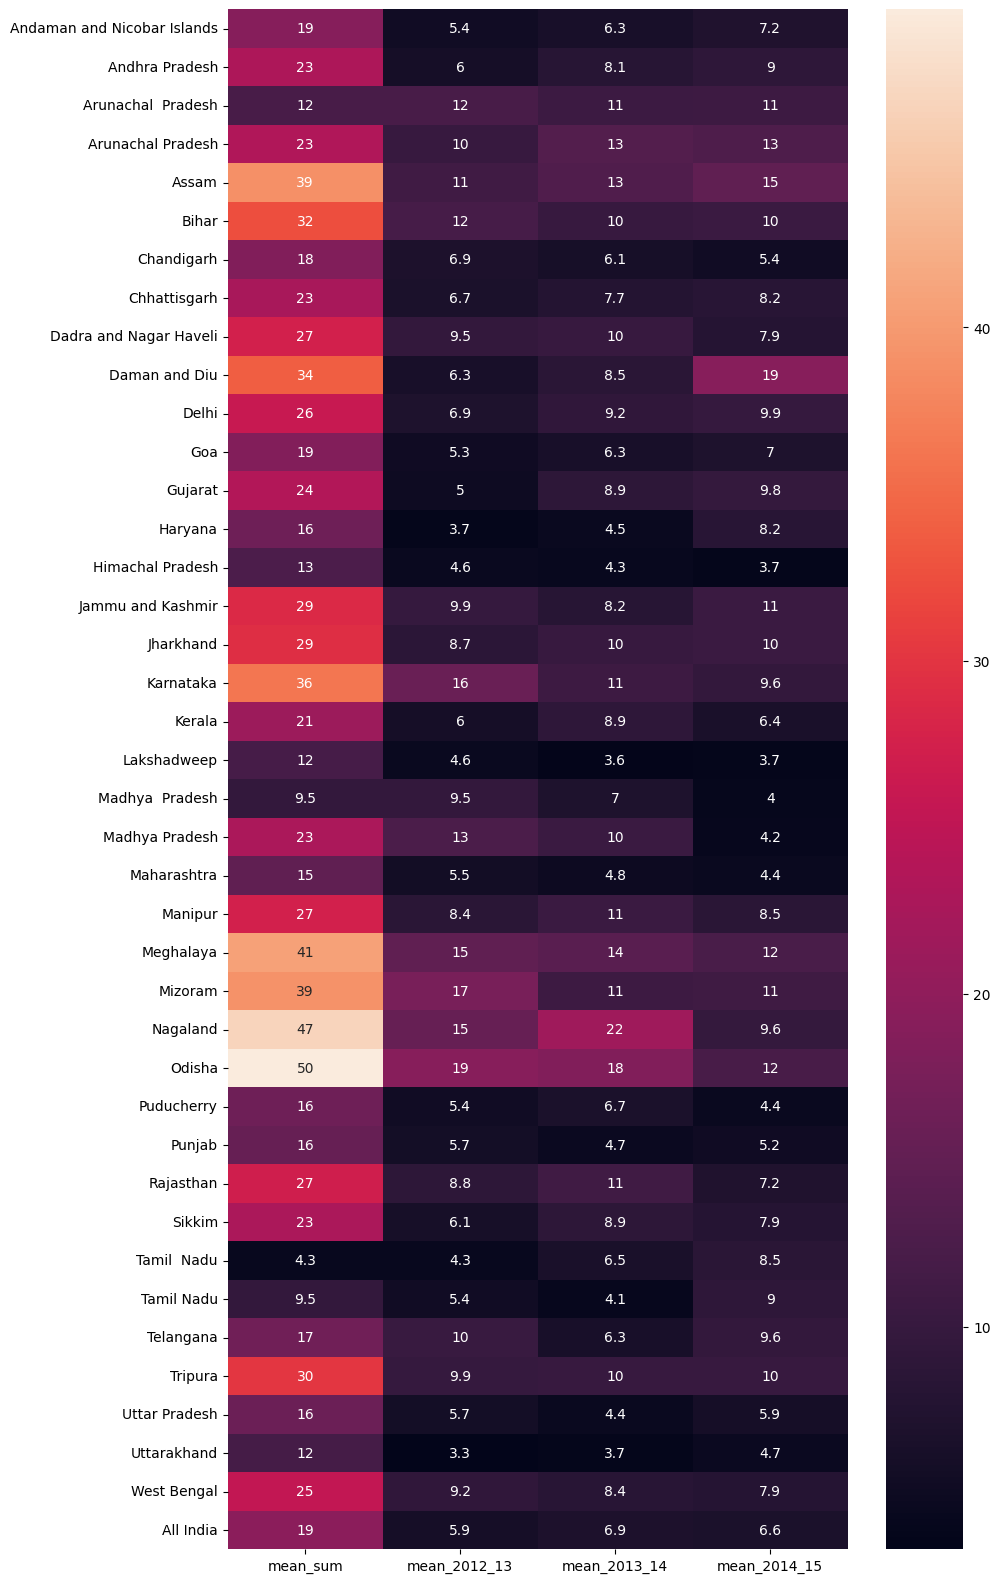

In [ ]:
plt.figure(figsize=(10, 20))
sns.heatmap(mean_df, annot = True)

In [ ]:
# plt.figure(figsize=(10, 20))
# sns.heatmap(dummy, annot = True)

Represented it with a heat map for the above dataframe.
It shows the same result.

**T-tests**

In [ ]:
t_stat, p_value = ttest_rel(mean_df['mean_2013_14'], mean_df['mean_2014_15'])
print(f"\nPaired samples t-test (dropout(13-14) vs. dropout(14-15)):")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Paired samples t-test (dropout(13-14) vs. dropout(14-15)):
t-statistic: 0.48
p-value: 0.6316


<Axes: >

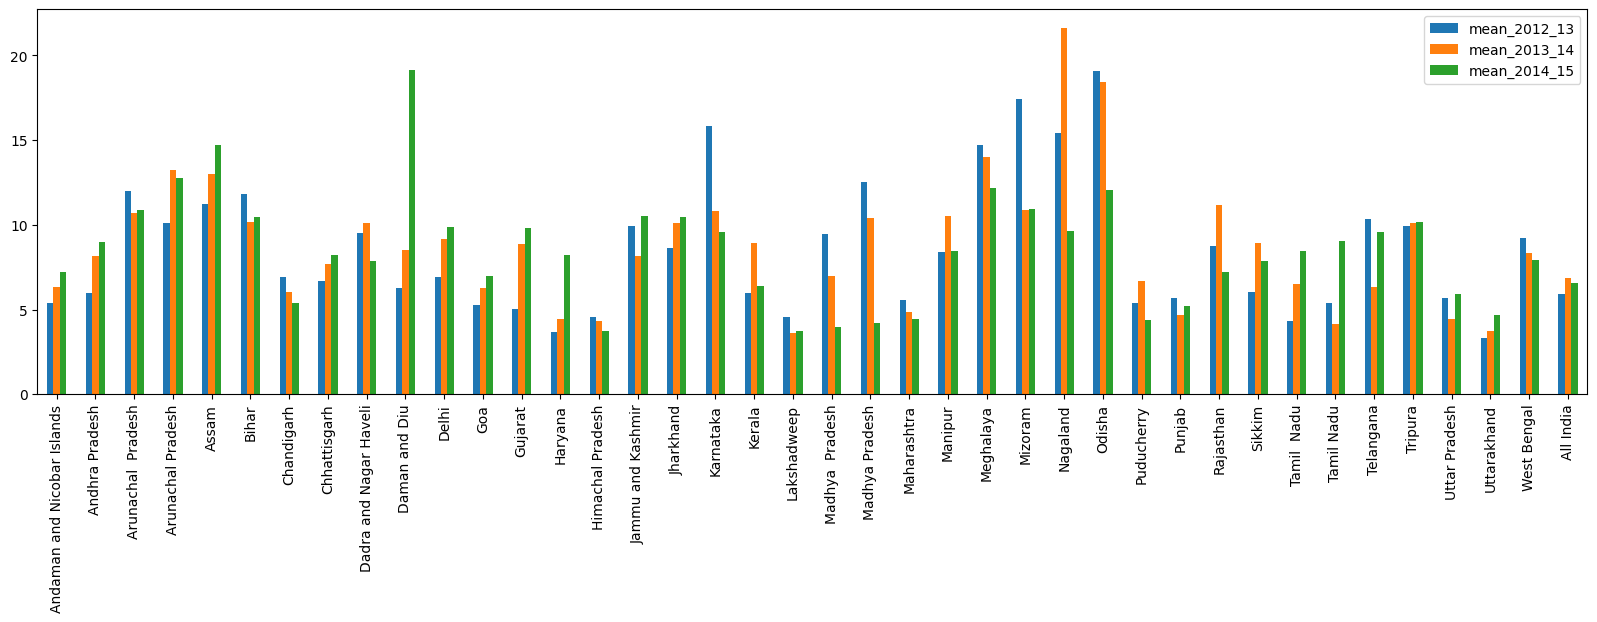

In [ ]:
mean_df[['mean_2012_13', 'mean_2013_14', 'mean_2014_15']].plot(kind='bar',figsize=(20,5))

In [ ]:
# dummy[['mean_2012_13', 'mean_2013_14', 'mean_2014_15']].plot(kind='bar',figsize=(20,5))

And also with a bar-plot

## In the year of 2012-13 Odisha had the highest dropout ratio, In the year 2013-14 Nagaland had the highest ratio and in the year 2014-15 it was Daman and Diu.

# After detailed analysis of dropout dataset we can conclude that the state of 'ODISHA' has the highest rate of dropout ratio.

## Although the ratio has decreased over the 3 sessions          (12-13,13-14,14-15),It still remains at the top.




**2. Enrollment Ratio**

In [ ]:
enroll.head()

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7


In [ ]:
enroll.keys()

Index(['State_UT', 'Year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper_Primary_Boys', 'Upper_Primary_Girls', 'Upper_Primary_Total',
       'Secondary_Boys', 'Secondary_Girls', 'Secondary_Total',
       'Higher_Secondary_Boys', 'Higher_Secondary_Girls',
       'Higher_Secondary_Total'],
      dtype='object')

Dataset of Gross enrollment ratio

<Axes: title={'center': 'Enrollment of Boys in schools in all States from 2013-2016'}, xlabel='State_UT'>

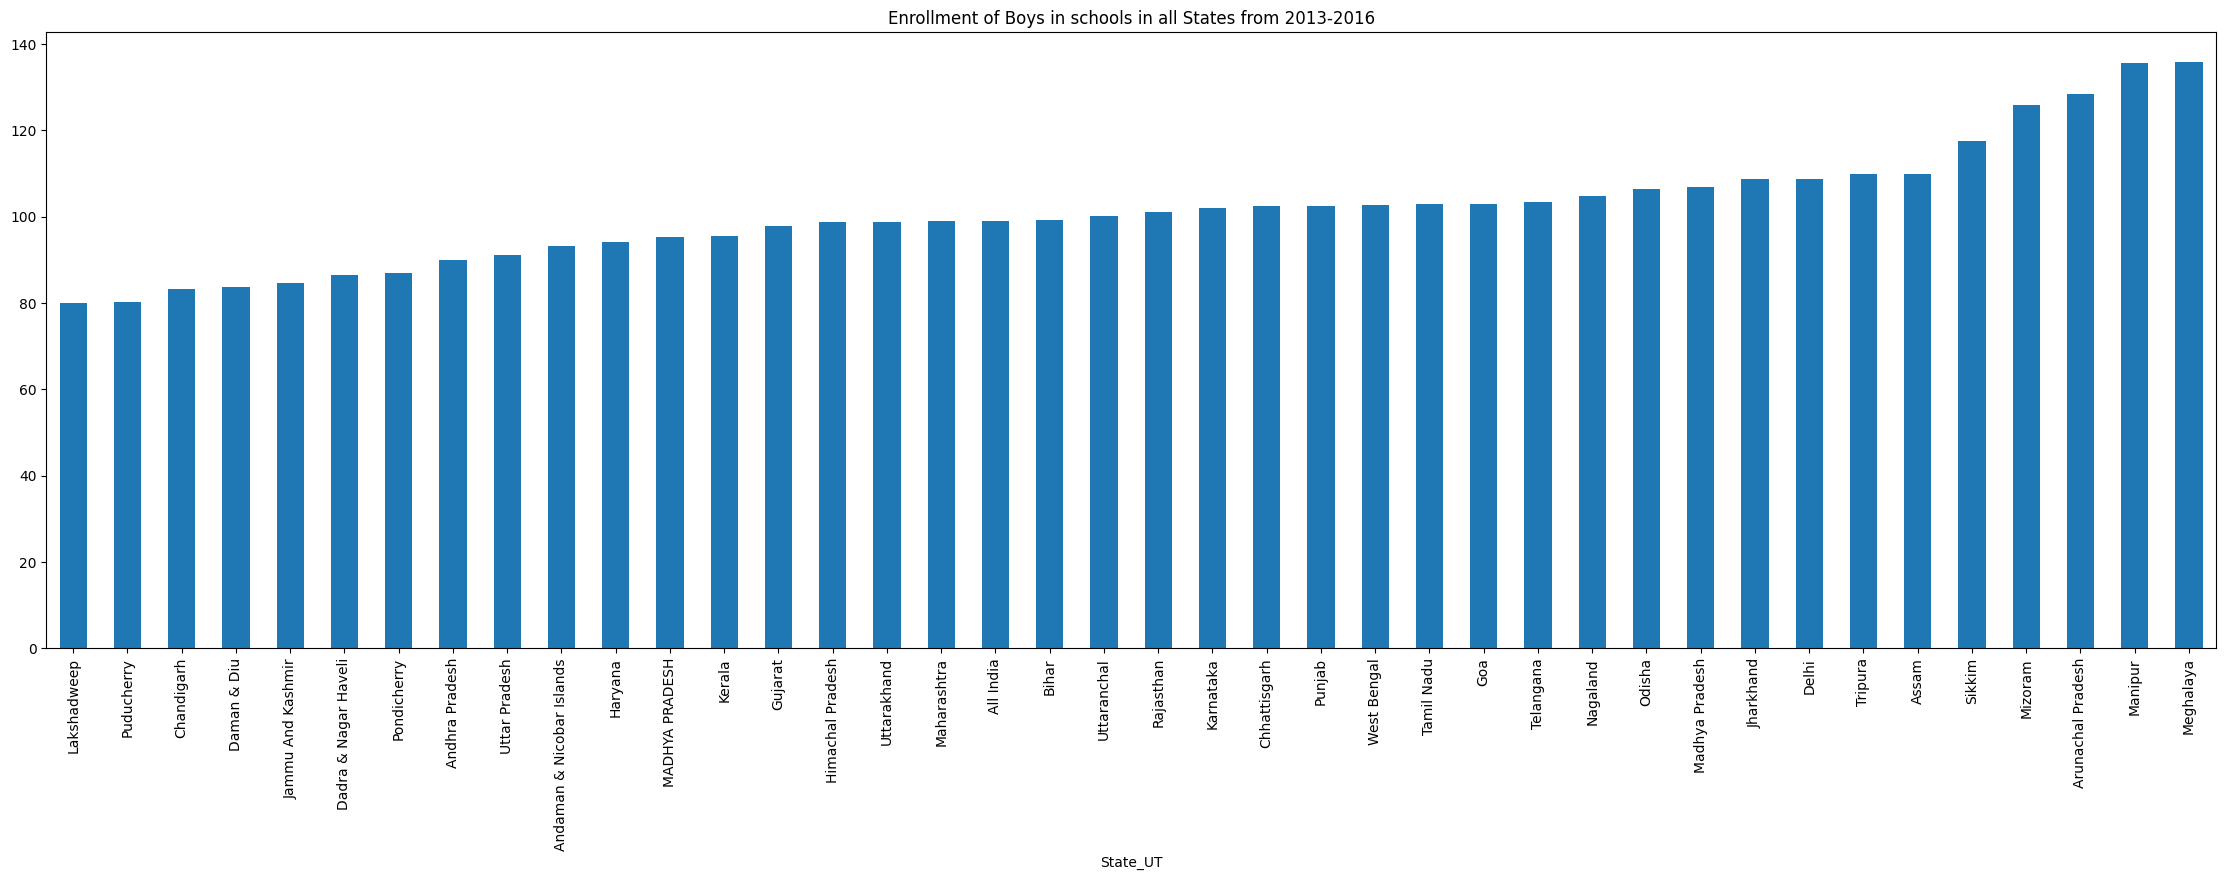

In [ ]:
enroll.groupby(['State_UT'])['Primary_Boys'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Enrollment of Boys in schools in all States from 2013-2016')


This bar-plot shows the distribution of enrollment ratio of boys in  schools across India.We can see that 'J&K' has the least ratio among states while 'Meghalaya' has the highest ratio among states.'Lakshadweep' has the highest ratio among UTs

In [ ]:
chart = px.pie(data_frame=enroll,values = 'Primary_Boys',names='State_UT',height = 500)
chart.update_traces(textposition = 'inside',textinfo = 'percent+label')

chart.update_layout(title_x = 0.5,
                   geo = dict(showframe = False,
                             showcoastlines = False))
chart.show()

This pie-chart also shows the same result

<Axes: title={'center': 'Enrollment of Girls in schools in all States from 2013-2016'}, xlabel='State_UT'>

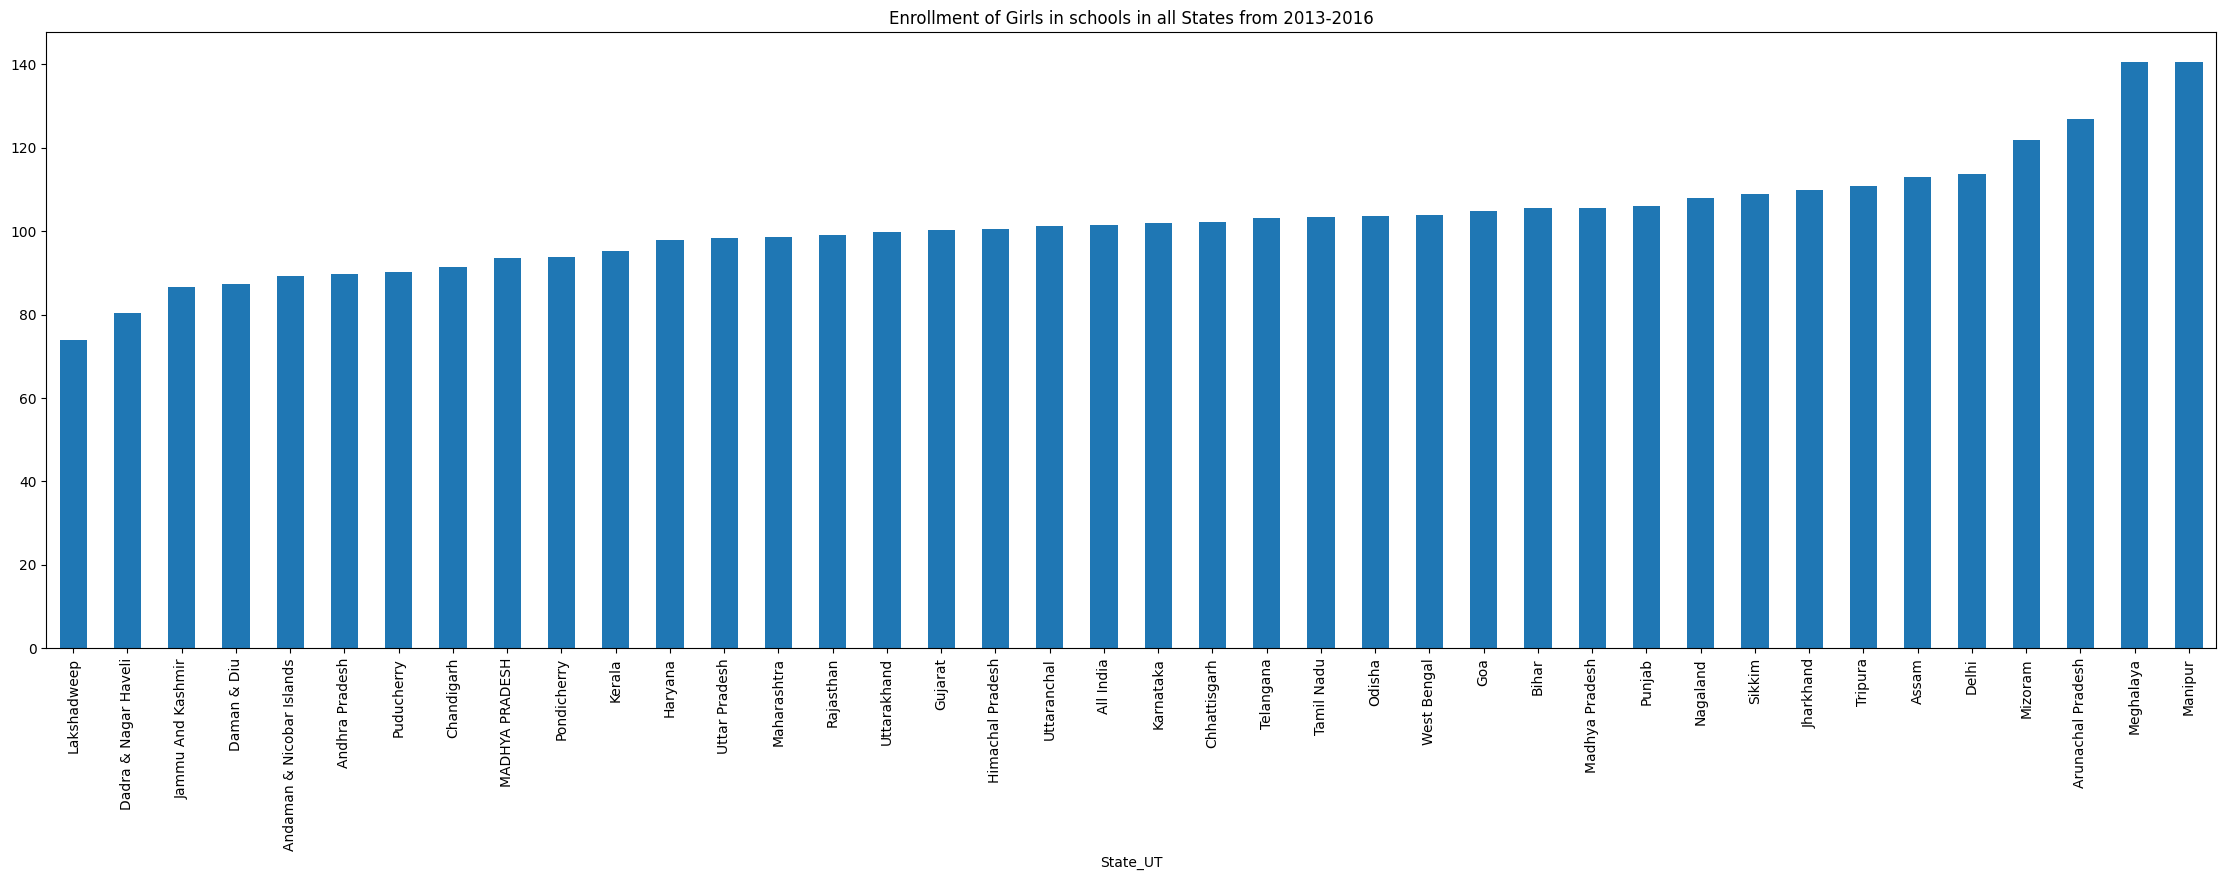

In [ ]:
enroll.groupby(['State_UT'])['Primary_Girls'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Enrollment of Girls in schools in all States from 2013-2016')

This bar-plot shows the distribution of enrollment ratio of girls in schools across India.We can see that 'J&K' has the least ratio among states while 'Manipur' has the highest ratio among states.'Lakshadweep' has the highest ratio among UTs

In [ ]:
chart = px.pie(data_frame=enroll,values = 'Primary_Girls',names='State_UT',height = 500)
chart.update_traces(textposition = 'inside',textinfo = 'percent+label')

chart.update_layout(title_x = 0.5,
                   geo = dict(showframe = False,
                             showcoastlines = False))
chart.show()

This pie-chart also shows the same result



**3. Electricity Dataset (Percentage of schools with electricity)**

In [ ]:
electricity.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,82.42,96.05,100.00,0.0,100.00,100.00,0.00,0.00,100.00,0.00,88.86
1,Andaman & Nicobar Islands,2014-15,80.72,96.30,100.00,100.0,100.00,100.00,0.00,0.00,100.00,0.00,88.89
2,Andaman & Nicobar Islands,2015-16,82.11,97.62,100.00,0.0,100.00,100.00,0.00,0.00,100.00,0.00,90.10
3,Andhra Pradesh,2013-14,87.66,93.57,99.32,100.0,67.48,96.19,96.15,97.50,100.00,91.27,90.34
4,Andhra Pradesh,2014-15,91.08,94.70,100.00,100.0,86.11,97.60,97.11,93.55,83.33,93.21,92.76


Dataset of percentage of schools with electricity

<Axes: title={'center': 'Electrified schools in all States from 2013-2016'}, xlabel='State_UT'>

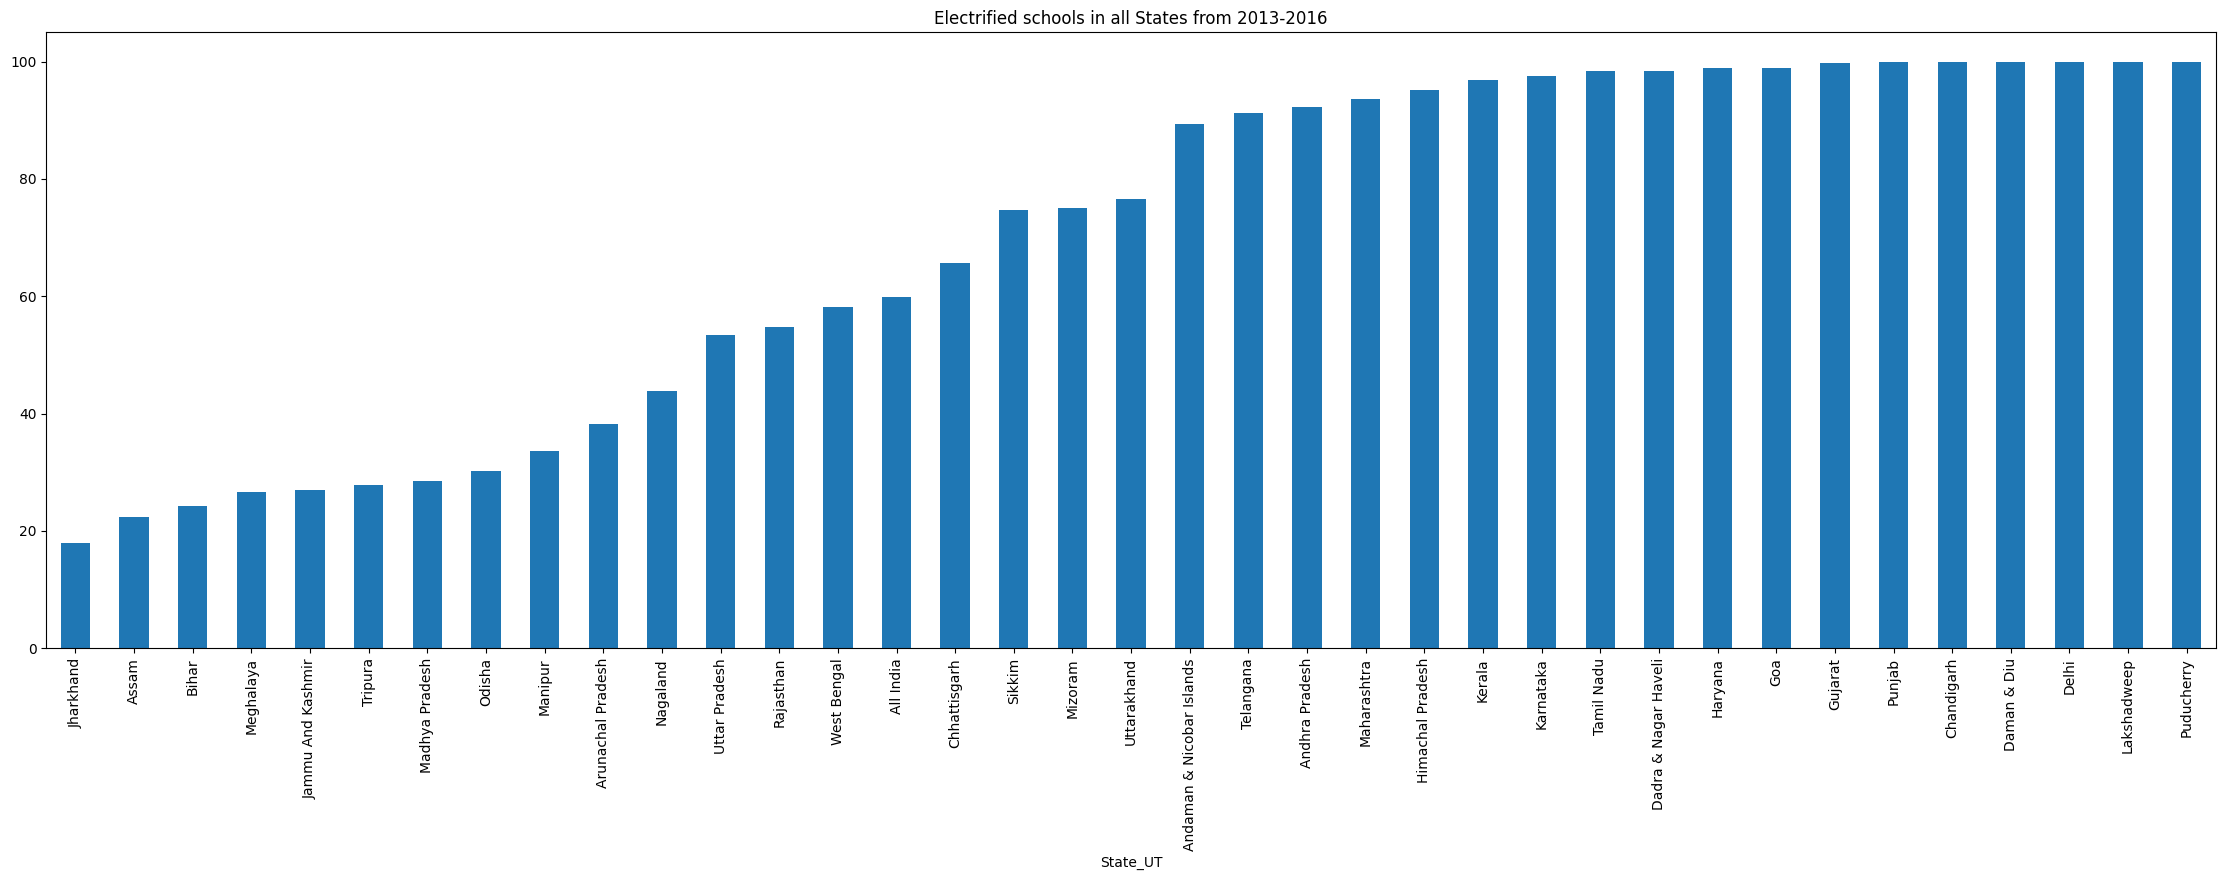

In [ ]:
electricity.groupby(['State_UT'])['All Schools'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Electrified schools in all States from 2013-2016')

This bar-plot shows the distribution of electrified schools across India.We can see that 'Jharkhand' has the least electrified schools while 'Puducherry' has the most electrified schools

**4. Water Dataset (% of schools having water capacity)**

In [ ]:
water.head()

,State/UT,Year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,98.68,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,98.69
1,Andaman & Nicobar Islands,2014-15,99.55,98.77,100.00,100.00,100.00,100.00,0.00,0.0,100.0,0.00,99.52
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,100.00
3,Andhra Pradesh,2013-14,86.89,94.53,99.66,90.91,87.26,98.84,96.02,97.5,100.0,97.52,90.35
4,Andhra Pradesh,2014-15,91.85,96.07,100.00,100.00,90.00,99.56,97.48,100.0,100.0,98.37,93.74


<Axes: title={'center': 'Schools with water facility in all States from 2013-2016'}, xlabel='State/UT'>

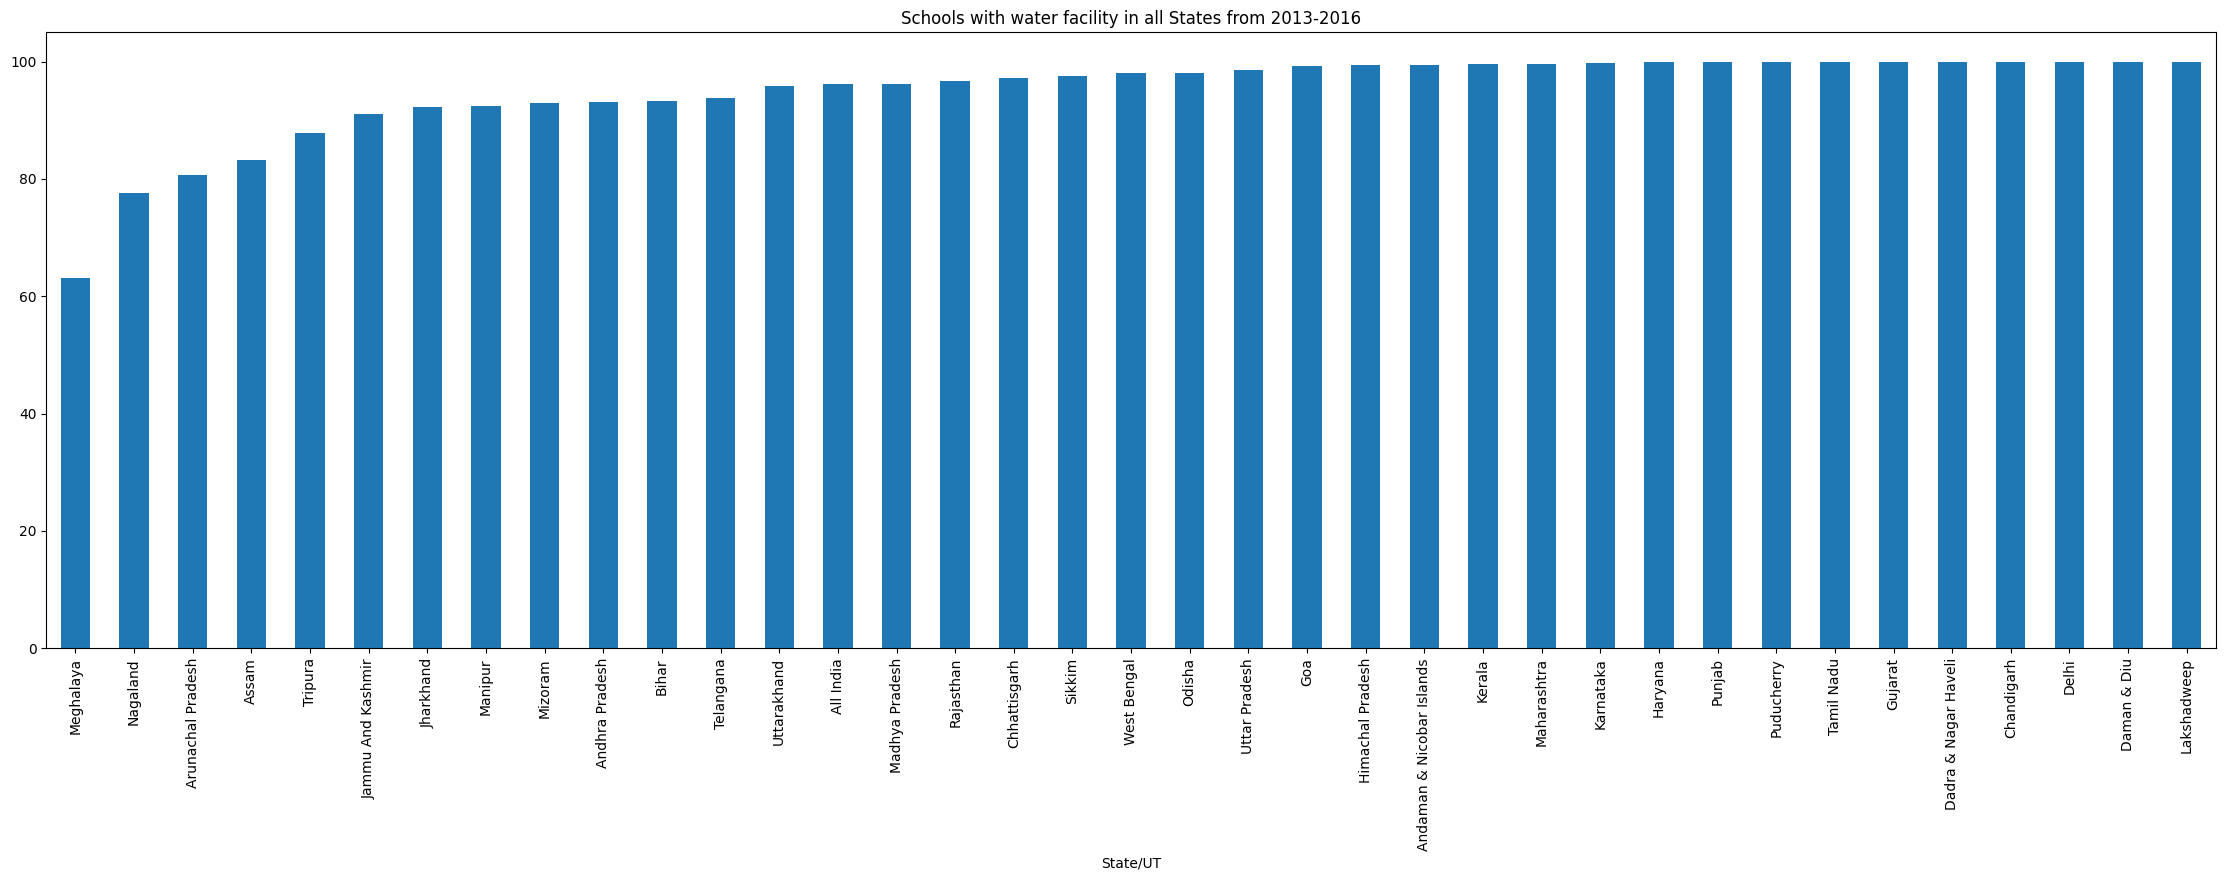

In [ ]:
water.groupby(['State/UT'])['All Schools'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Schools with water facility in all States from 2013-2016')

**Conclusion**

This bar-plot shows the distribution of schools with water facility across India.We can see that 'Meghayala' has the least number of schools with water facility while 'Lakshadweep' has the most number of schools with water facility.


**5. Computers Dataset (% of schools having computers)**

In [ ]:
computers.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,30.40,73.68,89.74,0.00,100.00,97.92,0.00,0.00,100.00,0.00,53.06
1,Andaman & Nicobar Islands,2014-15,30.94,76.54,92.11,100.00,94.74,100.00,0.00,0.00,100.00,0.00,57.25
2,Andaman & Nicobar Islands,2015-16,28.44,78.57,92.50,0.00,94.74,100.00,0.00,0.00,100.00,0.00,57.00
3,Andhra Pradesh,2013-14,12.73,42.72,86.99,45.45,17.07,68.18,73.23,60.00,33.33,19.32,29.57
4,Andhra Pradesh,2014-15,10.29,44.15,88.46,50.00,62.22,68.38,76.59,70.97,66.67,41.60,28.06


<Axes: title={'center': 'Schools with computer installed in all States from 2013-2016'}, xlabel='State_UT'>

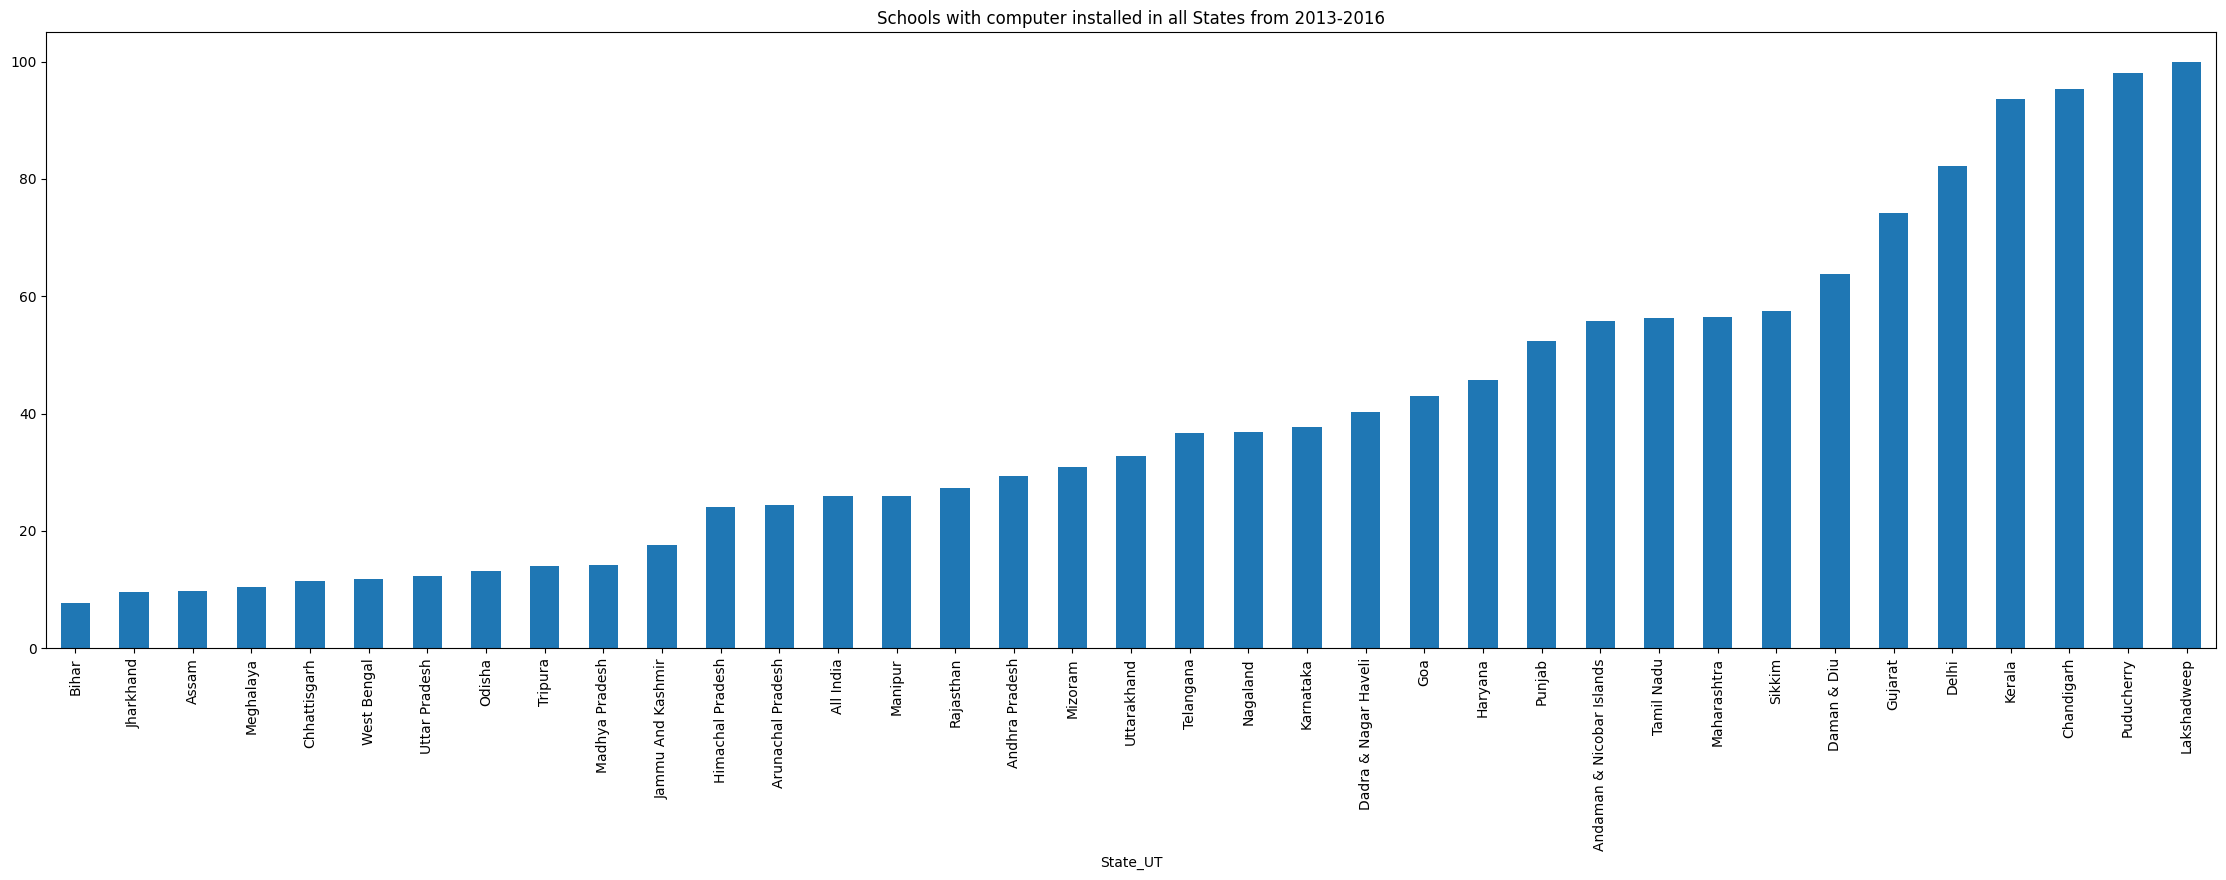

In [ ]:
computers.groupby(['State_UT'])['All Schools'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Schools with computer installed in all States from 2013-2016')

This bar-plot shows the distribution of schools with computer facility across India.We can see that 'Bihar' has the least number of schools with computer facility while 'Kerala' has the most number of schools with computer facility among the states. 'Lakshadweep','Puducherry'and 'Daman & Diu' have the most number of schools with computer facility among the union territories.

In [ ]:
# chart = px.pie(data_frame=computers,values = 'All Schools',names='State_UT',height = 600)
# chart.update_traces(textposition = 'inside',textinfo = 'percent+label')

# chart.update_layout(title_x = 0.5,
#                    geo = dict(showframe = False,
#                              showcoastlines = False))
# chart.show()

import plotly.graph_objects as go

# Data
labels = enroll['State_UT']
values = enroll['Primary_Boys']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update layout
fig.update_layout(title='Primary Boys Enrollment by State/UT')

# Show plot
fig.show()

This pie-chart also shows the same result as stated above.

**Co-relation**



In [ ]:
df1 = enroll.sort_values(by = ['State_UT'])['Primary_Total']
df2 = electricity.sort_values(by = ['State_UT'])['Primary_Only']
df3 = water.sort_values(by = ['State/UT'])['Primary_Only']
df4 = computers.sort_values(by = ['State_UT'])['Primary_Only']

Making sub datasets for further analysis.We are taking only the column of Primary education percentages.

In [ ]:
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

Defined the function for finding the mean and covariance

In [ ]:
def correlation(x, y):
    std_x = np.std(x)
    std_y = np.std(y)
    if std_x > 0 and std_y > 0:
        return covariance(x, y) / (std_x * std_y)
    else:
        return 0

Defined the function for finding the Correlation.

# Correlation analysis is a statistical method used to measure the strength of the linear relationship between two variables and compute their association.correlation analysis calculates the level of change in one variable due to the change in the other. A high correlation points to a strong relationship between the two variables, while a low correlation means that the variables are weakly related.


*   A positive correlation between two variables means both the variables move in the same direction. An increase in one variable leads to an increase in the other variable and vice versa.
*    A negative correlation between two variables means that the variables move in opposite directions. An increase in one variable leads to a decrease in the other variable and vice versa.



In [ ]:
enrollvselectricity=pd.concat([df1, df2],axis = 1)

In [ ]:
enrollvswater=pd.concat([df1, df3],axis = 1)

In [ ]:
enrollvscomputer=pd.concat([df1, df4],axis = 1)

Merged the sub-dataframes for ease of visulisation

In [ ]:
enrollvselectricity.head()

,Primary_Total,Primary_Only
109,100.08,52.40
72,99.21,18.38
35,101.36,99.23
73,90.92,18.07
36,88.93,98.87


In [ ]:
enrollvswater.head()

,Primary_Total,Primary_Only
109,100.08,95.78
72,99.21,69.27
35,101.36,99.97
73,90.92,72.27
36,88.93,99.80


In [ ]:
enrollvscomputer.head()

,Primary_Total,Primary_Only
109,100.08,10.36
72,99.21,4.98
35,101.36,28.11
73,90.92,4.97
36,88.93,7.43


Now we will plot the re-plot between the two columns.Relplot is a figure-level function for visualizing statistical relationships.

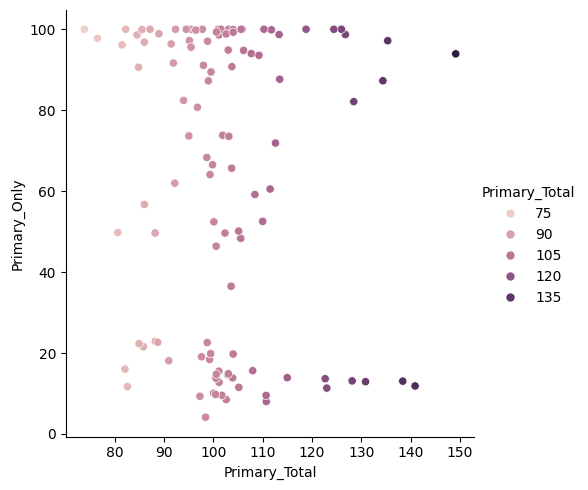

In [ ]:
sns.relplot(data=enrollvselectricity, x="Primary_Total", y="Primary_Only",hue="Primary_Total")

From the above relplot we can see that there is a relation between enrollment ration and electrization.There are schools with 100% electrization and 80-100% enrollment ratio.Also there are some schools with around 20% percent electrization but high enrollment ratio.

In [ ]:
correlation(df1,df2)

-0.5052932139586529

It has a negative correlation.

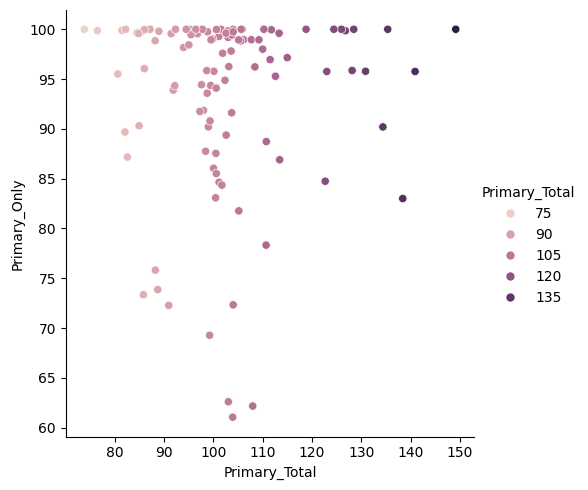

In [ ]:
sns.relplot(data=enrollvswater, x="Primary_Total", y="Primary_Only",hue="Primary_Total")

From the above relplot we can see that there is a relation between enrollment ration and water facility available.There are schools with 100% water facility available and 80-120% enrollment ratio.Also there are some schools with around 60-85% water facility available but high enrollment ratio.

In [ ]:
correlation(df1,df3)

-0.5860876941025648

it also has negative correlation

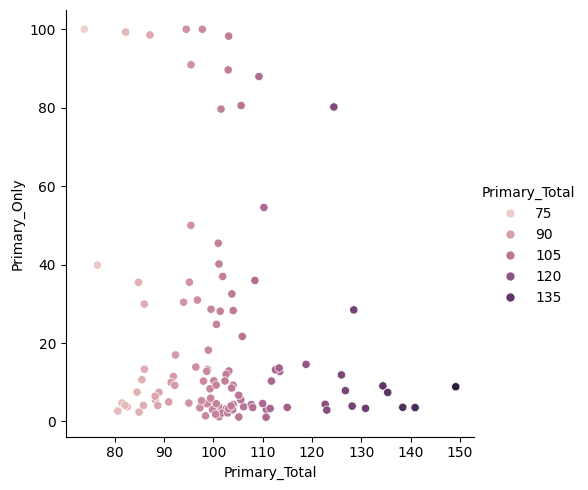

In [ ]:
sns.relplot(data=enrollvscomputer, x="Primary_Total", y="Primary_Only",hue="Primary_Total")

From the above relplot we can see that there is a relation between enrollment ration and computer facility available.There are very few schools with 100% computer facility available and 80-120% enrollment ratio.Overall there are schools with around 0-40% computer facility available but average to high enrollment ratio.


In [ ]:
correlation(df1,df4)

-0.3695069407023588

it also has negative correlation

In [ ]:
electricityvscomputer=pd.concat([df2, df4],axis = 1)

In [ ]:
electricityvscomputer.columns=['Primary_Elec','Primary_Comps']

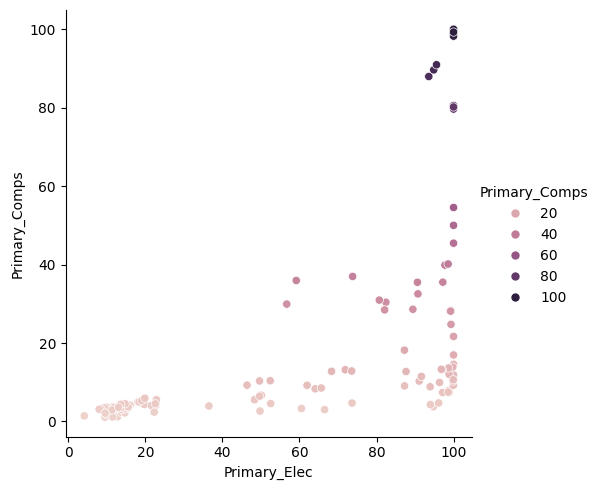

In [ ]:
sns.relplot(data=electricityvscomputer, x="Primary_Elec", y="Primary_Comps",hue="Primary_Comps")

From the above relplot we can see that there is a relation between enrollment ration and computer facility available.There are very few schools with 100% computer facility available even if they are 80-100% electrisized.Overall there are schools with around 0-20% computer facility available but average to high electrization.

In [ ]:
correlation(df2,df4)

0.5552681720903827

It has a poitive correlation.As we electrify the schools we can increase the computer facilities

In [ ]:
boys_toilet.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
3,Andhra Pradesh,2013-14,53.03,62.58,82.05,45.45,64.11,76.24,60.63,59.26,85.71,73.44,56.88
4,Andhra Pradesh,2014-15,57.91,76.51,96.00,75.00,93.33,91.43,77.99,80.65,60.00,86.54,65.34


In [ ]:
girls_toilet.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,All India,2013-14,88.68,95.98,98.81,91.39,98.25,97.33,94.40,99.06,98.36,76.14,91.23
1,All India,2014-15,91.21,96.92,99.48,91.39,99.23,98.19,96.61,90.26,94.05,90.94,93.08
2,All India,2015-16,96.95,99.03,99.72,96.32,99.60,99.31,98.82,95.18,98.31,96.22,97.52
3,Andaman & Nicobar Islands,2013-14,89.74,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,93.44
4,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00


In [ ]:
df5 = boys_toilet.sort_values(by = ['State_UT'])['Primary_Only']
df6 = girls_toilet.sort_values(by = ['State_UT'])['Primary_Only']

Making sub datasets for further analysis.We are taking only the column of Primary education percentages.

In [ ]:
boysvsgirls=pd.concat([df5, df6],axis = 1)

In [ ]:
boysvsgirls.columns=['Primary_Boys','Primary_Girls']

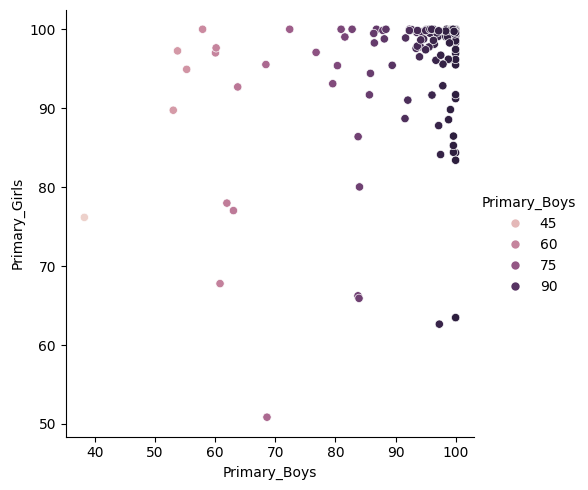

In [ ]:
sns.relplot(data=boysvsgirls, x="Primary_Boys", y="Primary_Girls",hue="Primary_Boys")

From the above relplot we can see that there is a good relation between boys toilet facility and girls toilet facility available.Overall almost all the schools have around 85-100% boys and girls toilet facility.

In [ ]:
correlation(df5,df6)

0.6006948283750444

It has a high positive correlation which is a good sign

In [ ]:
boys_melted = pd.melt(boys_toilet, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')
girls_melted = pd.melt(girls_toilet, id_vars=['State_UT', 'year'], var_name='School_Level', value_name = 'toilet')

In [ ]:
boys_melted

,State_UT,year,School_Level,toilet
0,Andaman & Nicobar Islands,2013-14,Primary_Only,91.58
1,Andaman & Nicobar Islands,2014-15,Primary_Only,100.00
2,Andaman & Nicobar Islands,2015-16,Primary_Only,100.00
3,Andhra Pradesh,2013-14,Primary_Only,53.03
4,Andhra Pradesh,2014-15,Primary_Only,57.91
...,...,...,...,...
1205,West Bengal,2014-15,All Schools,89.93
1206,West Bengal,2015-16,All Schools,97.70
1207,All India,2013-14,All Schools,86.56
1208,All India,2014-15,All Schools,88.62


We melt the dataset for easy visulization.
(Melting means un-pivoting the dataset and takes data in wide format and stacks a set of columns into a single column of data)

In [ ]:
boys_2013 = boys_melted.iloc[np.where(boys_melted.year=='2013-14')]
boys_2014 = boys_melted.iloc[np.where(boys_melted.year=='2014-15')]
boys_2015 = boys_melted.iloc[np.where(boys_melted.year=='2015-16')]

In [ ]:
girls_2013 = girls_melted.iloc[np.where(girls_melted.year=='2013-14')]
girls_2014 = girls_melted.iloc[np.where(girls_melted.year=='2014-15')]
girls_2015 = girls_melted.iloc[np.where(girls_melted.year=='2015-16')]

<Axes: title={'center': 'Toilet Failities for boys in all States from 2013-2016'}, xlabel='State_UT'>

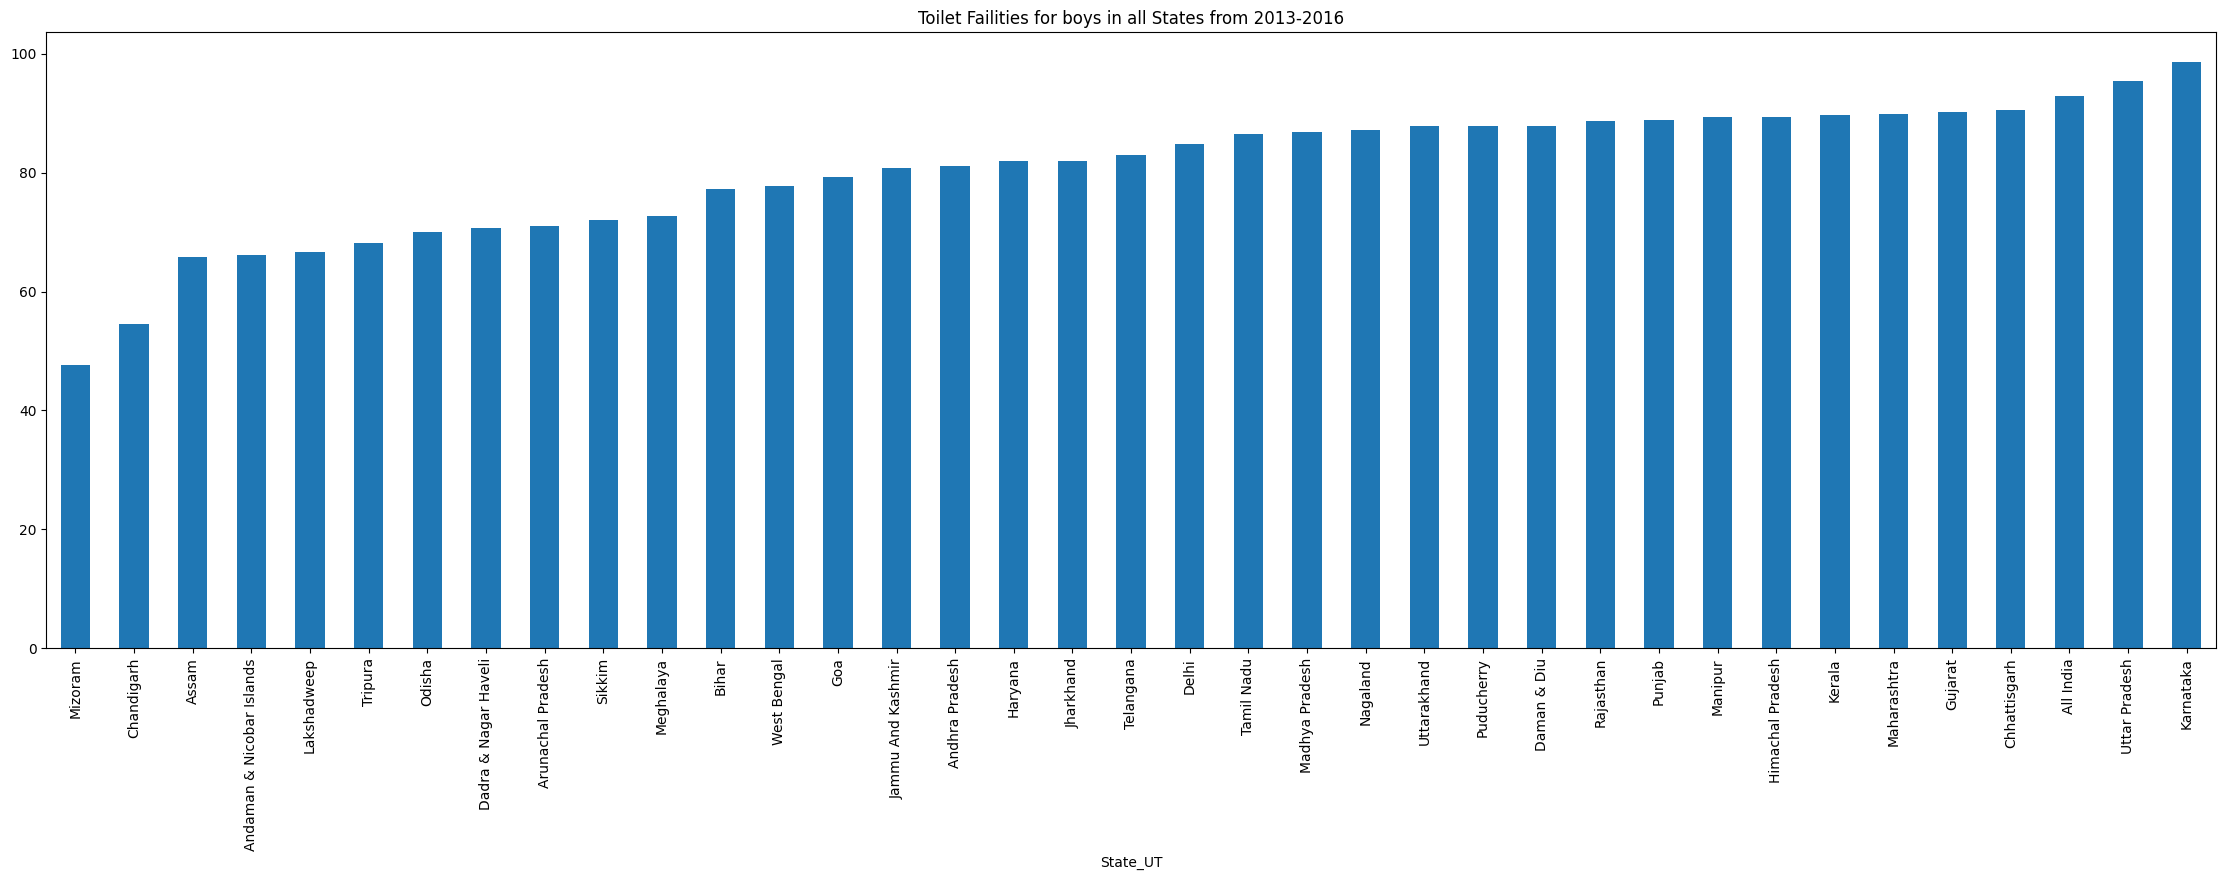

In [ ]:
boys_melted.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for boys in all States from 2013-2016')


We can see from this bar-plot that 'Mizoram' has the least available boys toilet facility and 'Karnataka' has the most available boys toilet for all the 3 sessions.

<Axes: title={'center': 'Toilet Failities for girls in all States from 2013-2016'}, xlabel='State_UT'>

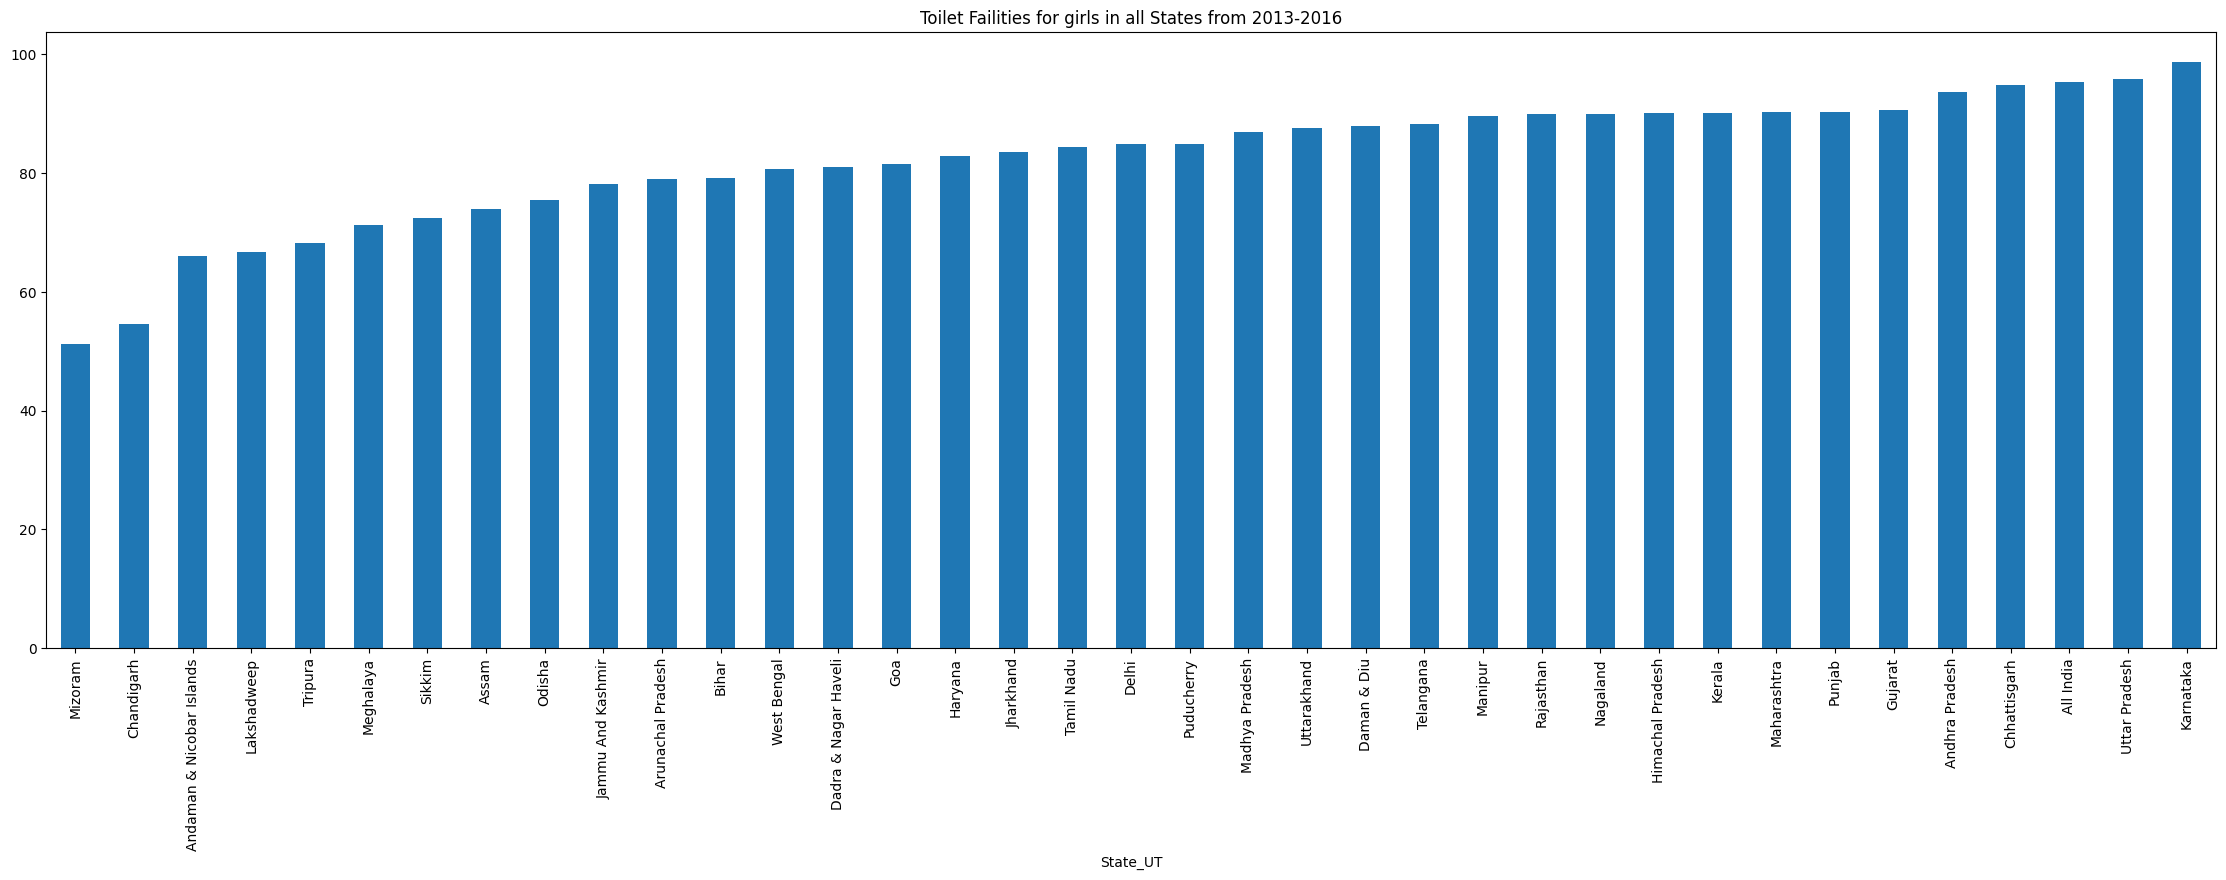

In [ ]:
girls_melted.groupby(['State_UT'])['toilet'].mean().sort_values().plot(kind='bar', figsize = (28,8), title = 'Toilet Failities for girls in all States from 2013-2016')

In [ ]:
boys_2013.keys()

Index(['State_UT', 'year', 'School_Level', 'toilet'], dtype='object')

In [ ]:
boys_2013['School_Level'].unique()

array(['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'], dtype=object)

In [ ]:

boys_2013

,State_UT,year,School_Level,toilet
0,Andaman & Nicobar Islands,2013-14,Primary_Only,91.58
3,Andhra Pradesh,2013-14,Primary_Only,53.03
6,Arunachal Pradesh,2013-14,Primary_Only,38.24
9,Assam,2013-14,Primary_Only,60.81
12,Bihar,2013-14,Primary_Only,63.04
...,...,...,...,...
1195,Tripura,2013-14,All Schools,91.15
1198,Uttar Pradesh,2013-14,All Schools,97.25
1201,Uttarakhand,2013-14,All Schools,94.71
1204,West Bengal,2013-14,All Schools,81.42


<Axes: title={'center': 'Toilet Facilities for Boys in All School Categories in 2013-14 Session'}, xlabel='State_UT'>

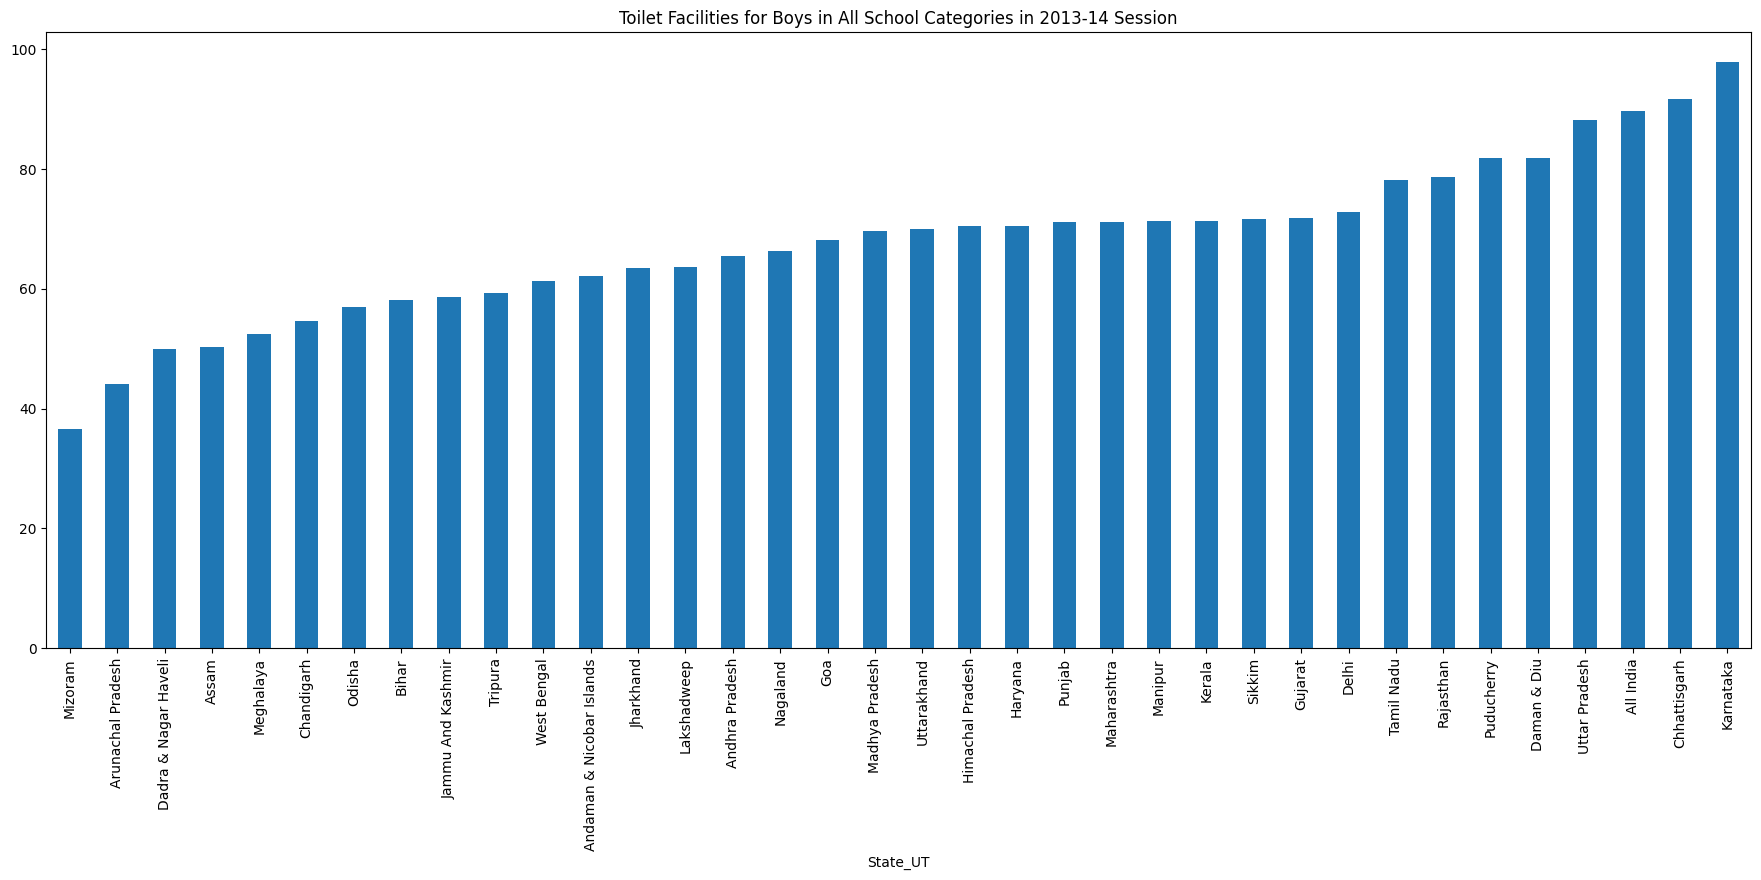

In [ ]:
#Boys 2013

# Convert 'toilet' column to numeric using .loc[]
boys_2013.loc[:, 'toilet'] = pd.to_numeric(boys_2013['toilet'], errors='coerce')

# Group by 'State_UT' and calculate the mean of 'toilet' for each state
mean_toilet = boys_2013.groupby('State_UT')['toilet'].mean().sort_values()

# Plot the mean toilet facilities for boys in all school categories
mean_toilet.plot(kind='bar', figsize=(22, 8), title='Toilet Facilities for Boys in All School Categories in 2013-14 Session')



<Axes: title={'center': 'Toilet Facilities for Girls in All School Categories in 2013-14 Session'}, xlabel='State_UT'>

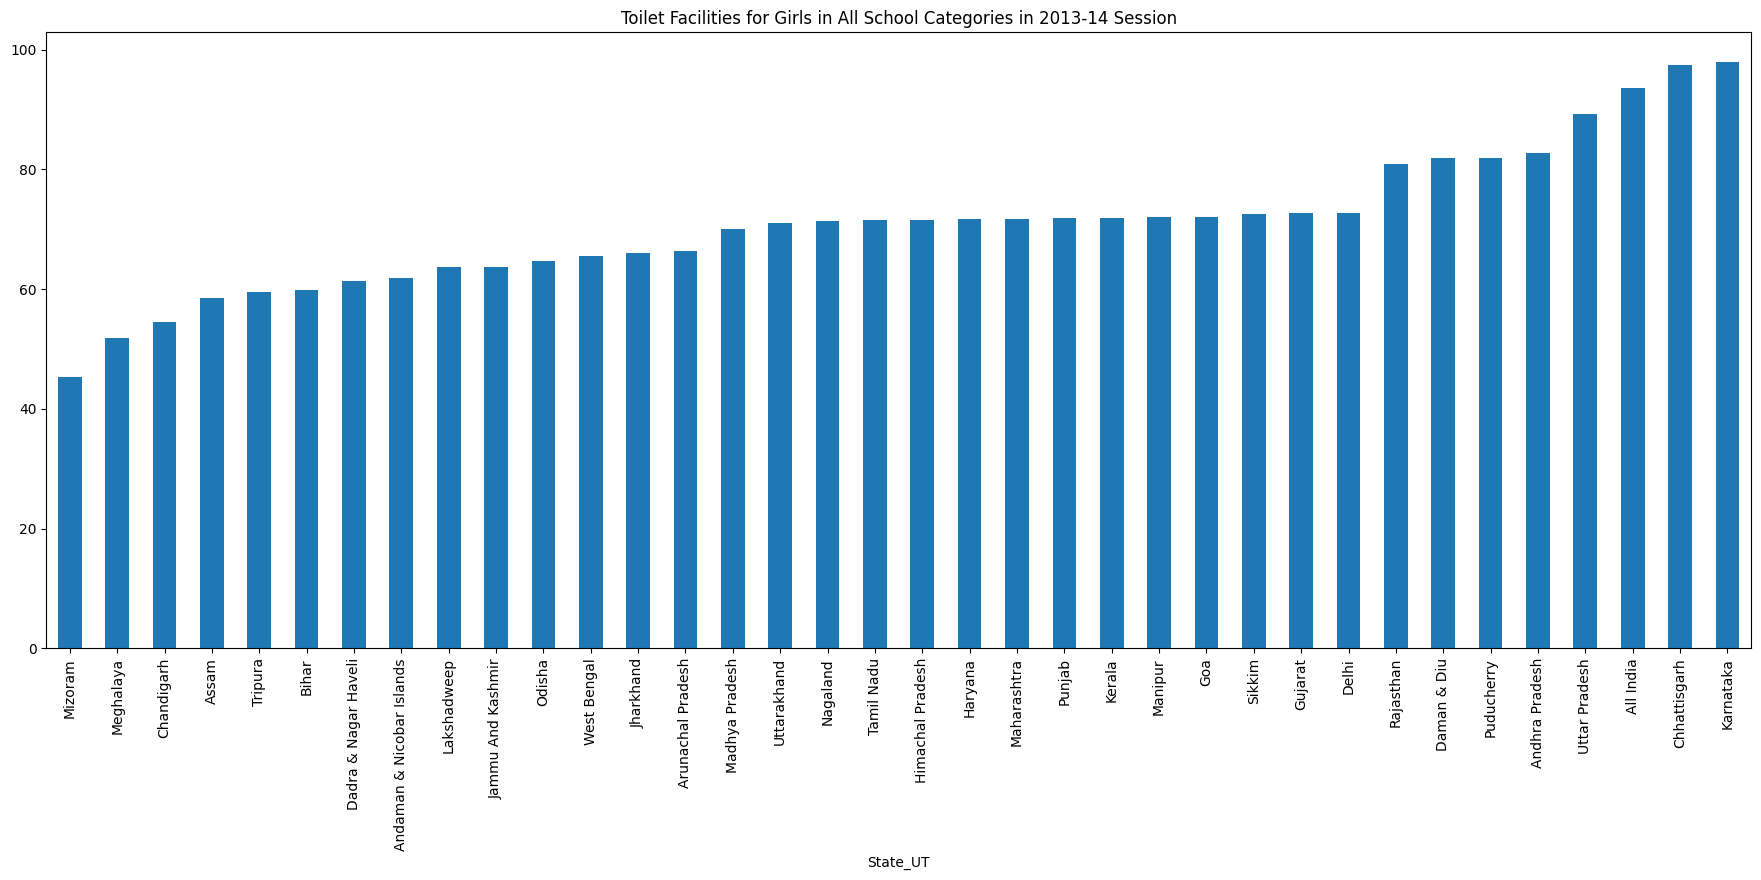

In [ ]:
# Girls 2013

girls_2013.loc[:, 'toilet'] = pd.to_numeric(girls_2013['toilet'], errors='coerce')
mean_toilet = girls_2013.groupby('State_UT')['toilet'].mean().sort_values()
mean_toilet.plot(kind='bar', figsize=(22, 8), title='Toilet Facilities for Girls in All School Categories in 2013-14 Session')


<Axes: title={'center': 'Toilet Facilities for Boys in All School Categories in 2014-15 Session'}, xlabel='State_UT'>

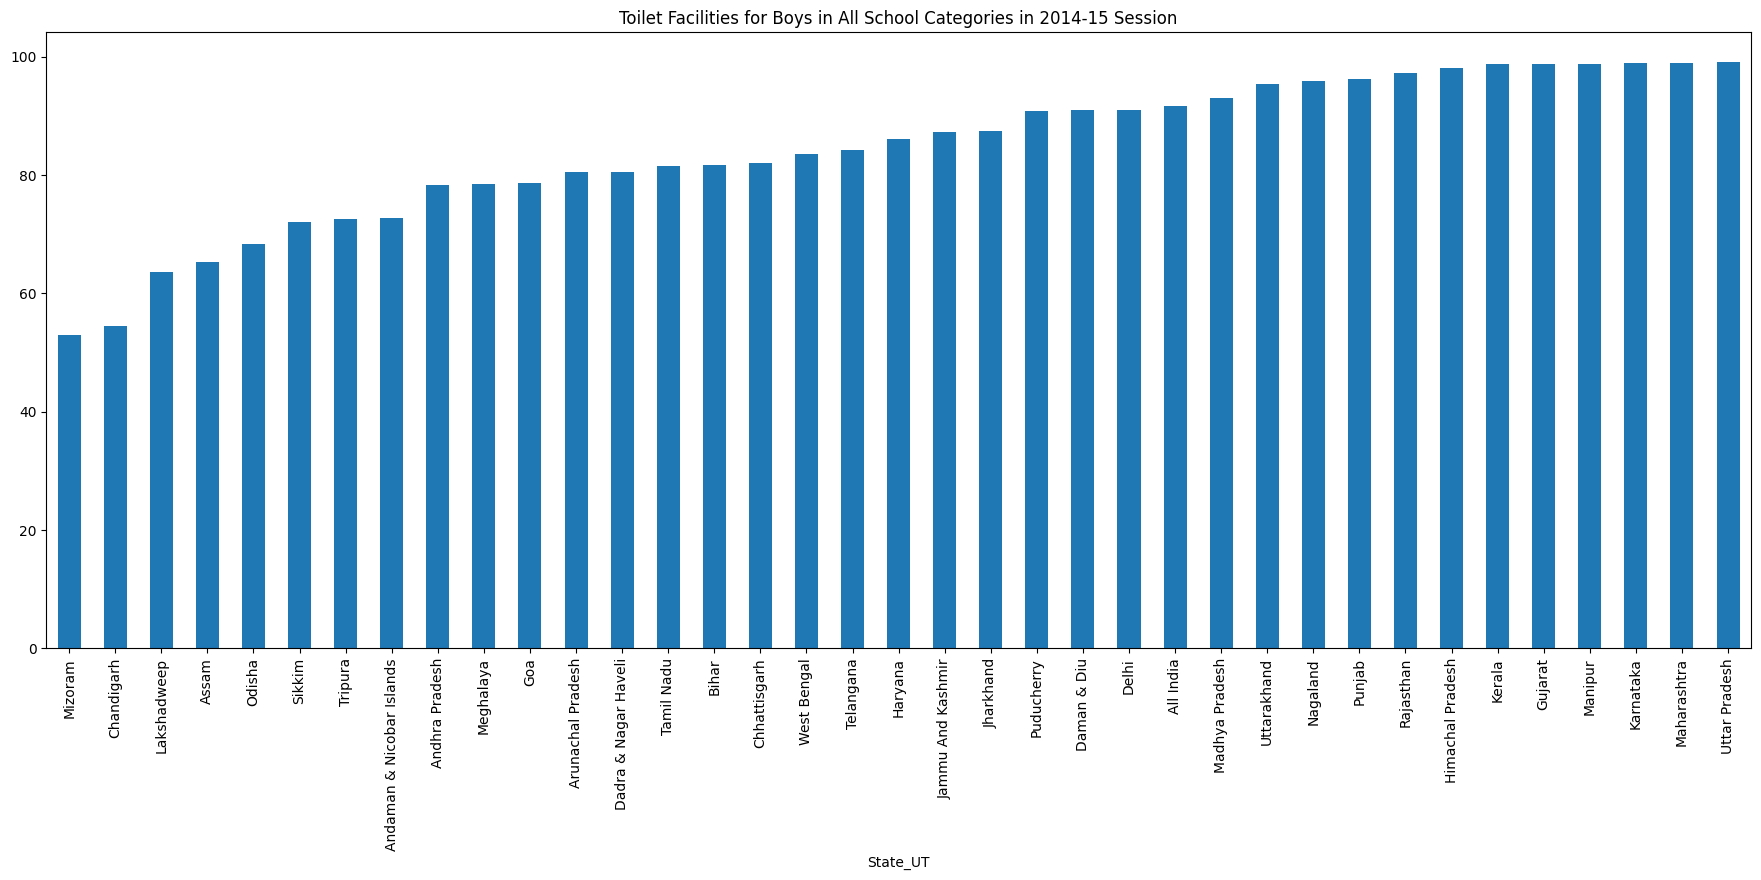

In [ ]:

#Boys 2014

boys_2014.loc[:, 'toilet'] = pd.to_numeric(boys_2014['toilet'], errors='coerce')
mean_toilet = boys_2014.groupby('State_UT')['toilet'].mean().sort_values()
mean_toilet.plot(kind='bar', figsize=(22, 8), title='Toilet Facilities for Boys in All School Categories in 2014-15 Session')


<Axes: title={'center': 'Toilet Facilities for Girls in All School Categories in 2014-15 Session'}, xlabel='State_UT'>

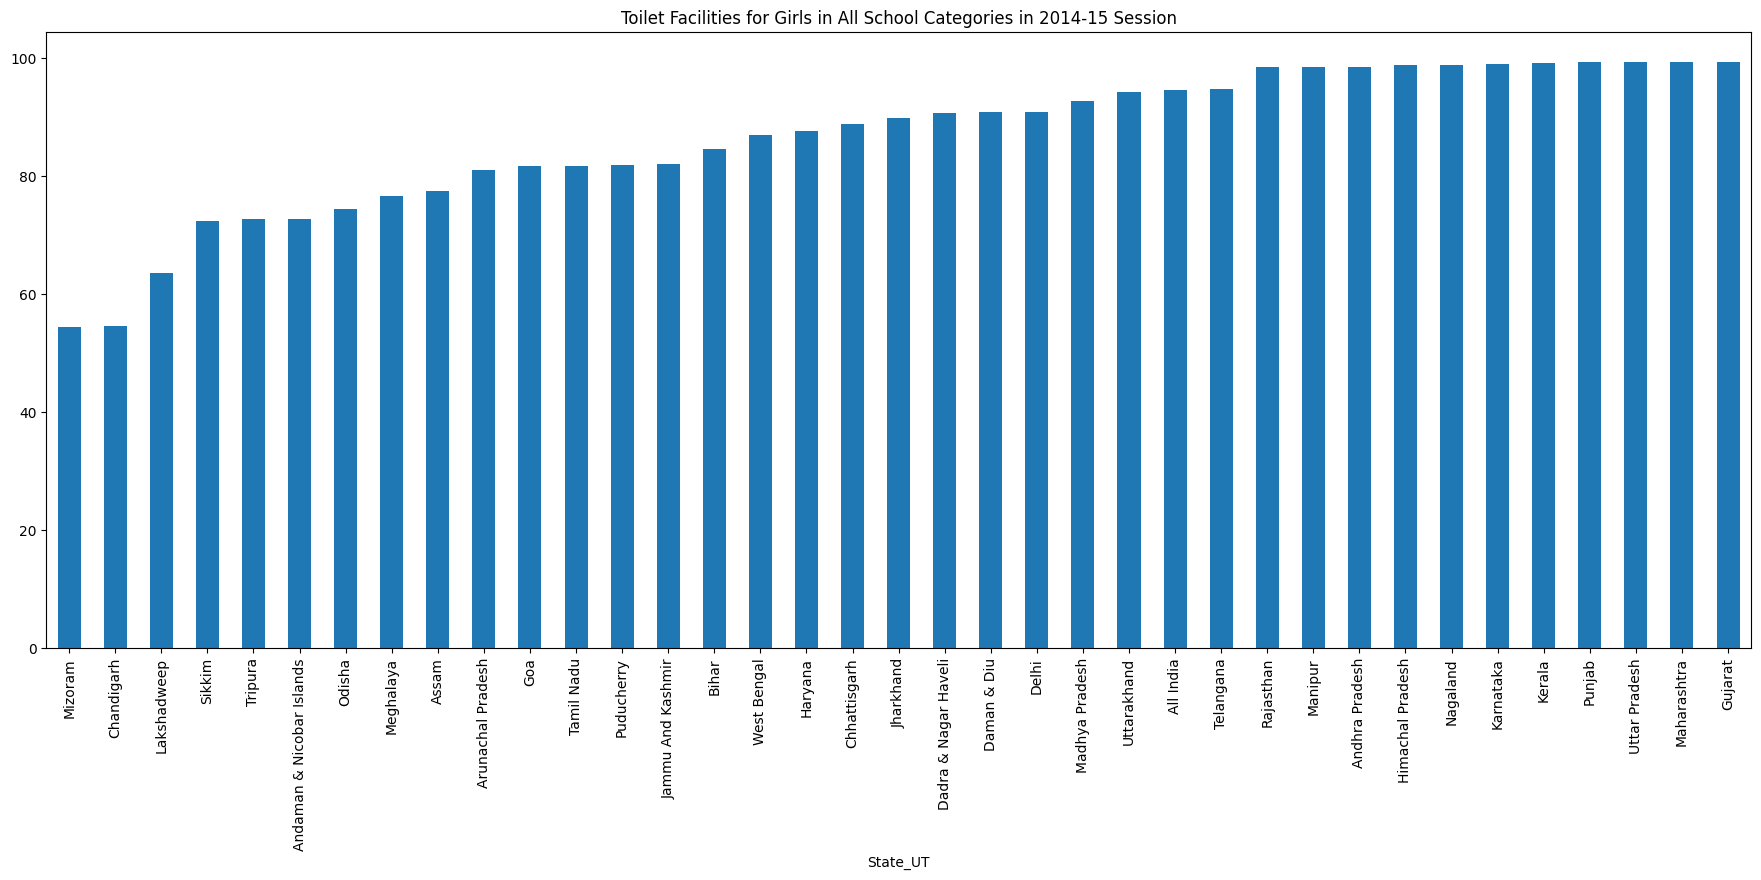

In [ ]:
# Girls 2014

girls_2014.loc[:, 'toilet'] = pd.to_numeric(girls_2014['toilet'], errors='coerce')
mean_toilet = girls_2014.groupby('State_UT')['toilet'].mean().sort_values()
mean_toilet.plot(kind='bar', figsize=(22, 8), title='Toilet Facilities for Girls in All School Categories in 2014-15 Session')

<Axes: title={'center': 'Toilet Facilities for Boys in All School Categories in 2015-16 Session'}, xlabel='State_UT'>

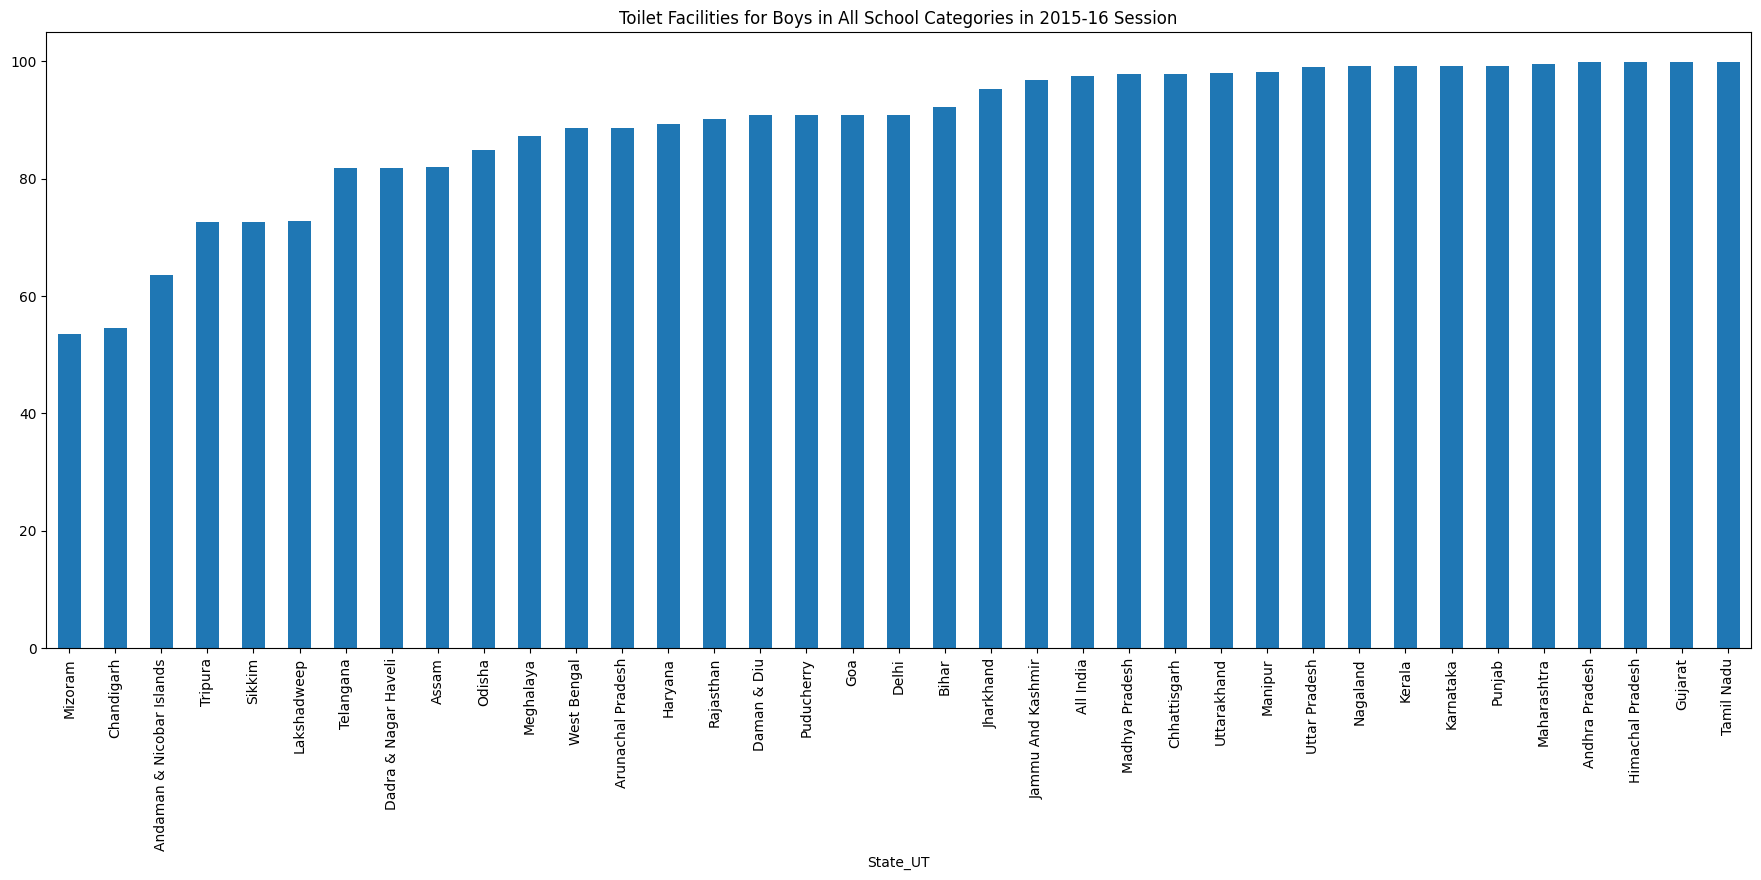

In [ ]:
#Boys 2015

boys_2015.loc[:, 'toilet'] = pd.to_numeric(boys_2015['toilet'], errors='coerce')
mean_toilet = boys_2015.groupby('State_UT')['toilet'].mean().sort_values()
mean_toilet.plot(kind='bar', figsize=(22, 8), title='Toilet Facilities for Boys in All School Categories in 2015-16 Session')

<Axes: title={'center': 'Toilet Facilities for Girls in All School Categories in 2015-16 Session'}, xlabel='State_UT'>

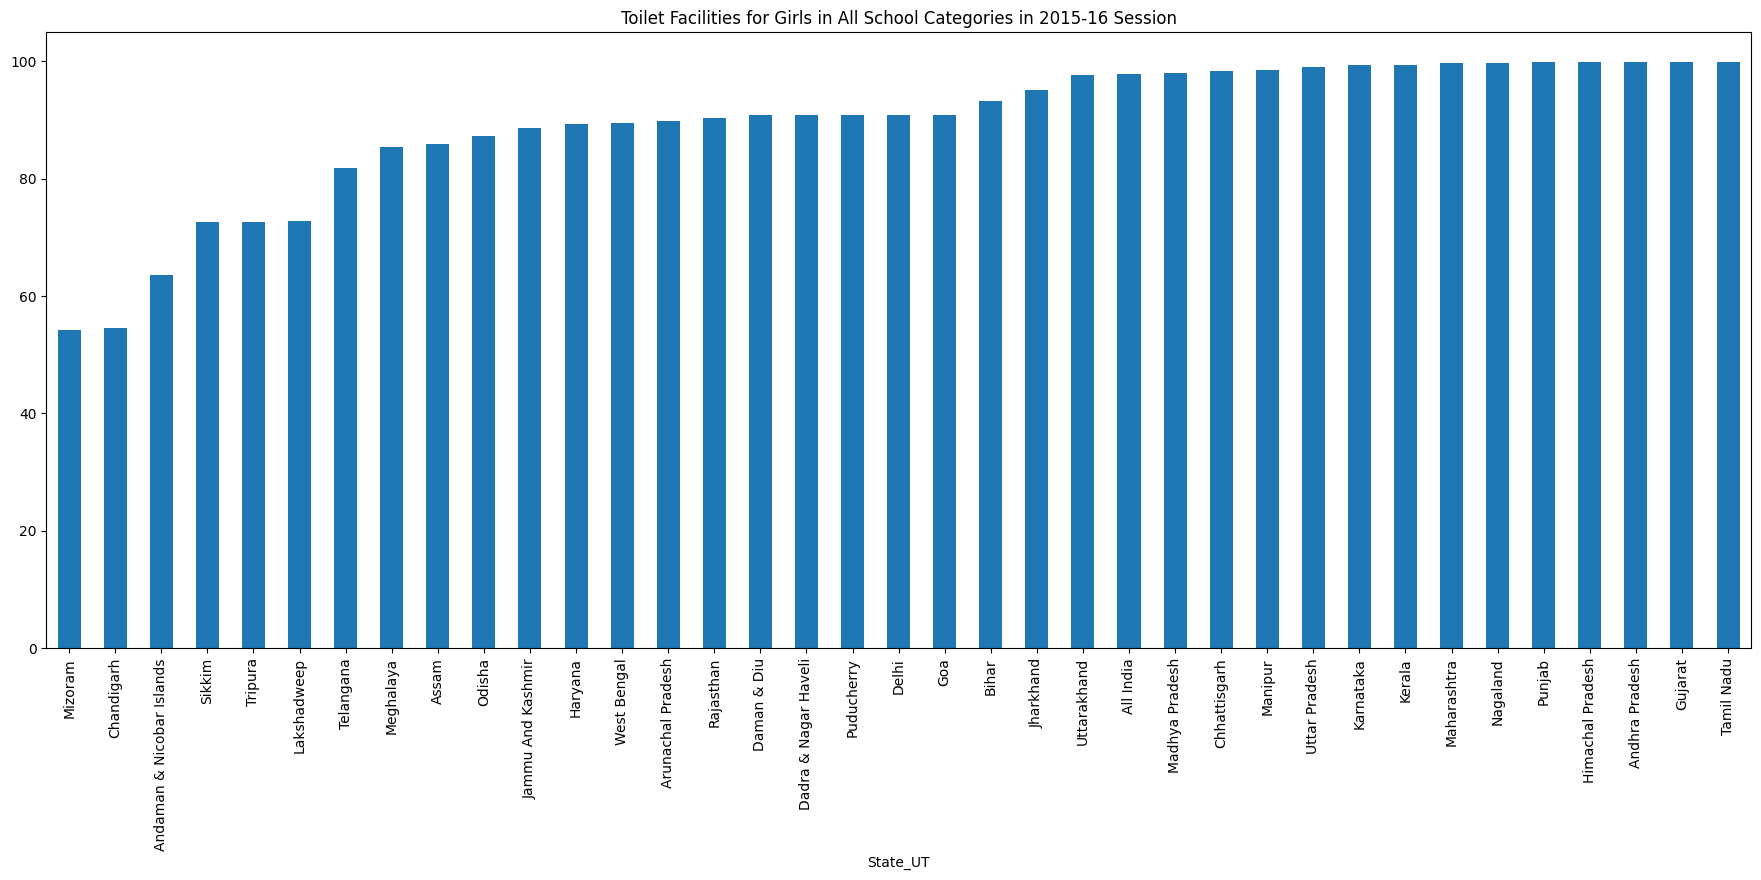

In [ ]:
# Girls 2015

girls_2015.loc[:, 'toilet'] = pd.to_numeric(girls_2015['toilet'], errors='coerce')
mean_toilet = girls_2015.groupby('State_UT')['toilet'].mean().sort_values()
mean_toilet.plot(kind='bar', figsize=(22, 8), title='Toilet Facilities for Girls in All School Categories in 2015-16 Session')

# **We can see from this bar-plot that 'Mizoram' has the least available girls toilet facility and 'Karnataka' has the most available girls toilet for all the 3 sessions.**

# Now we see the trend of Toilet facilities accross India in all 3 sessions

# We can conclude the following things

*   Uttar Pradesh,Maharashtra and Gujarat have done a good job in increaseing Toilet facilities in their schools for the year 2014-15.
*   For the year 2015-16 Tamil nadu has seen a tremendous increase in toilets in their schools.

*   Mizoram still remains the state with least number of toilets for both Boys and Girls for all the 3 sessions

# Overall there has been an increase in number of toilets accross India in the year 2015-16







# We now explore the recent sanitation conditions of our country

In [ ]:
water_all = water[water['Year']=='2015-16'][['State/UT','All Schools']]
boys_toilet_all = boys_toilet[boys_toilet['year']=='2015-16'][['State_UT','All Schools']]
girls_toilet_all = girls_toilet[girls_toilet['year']=='2015-16'][['State_UT','All Schools']]

water_all = water_all.rename(columns={'State/UT':'State_UT'})

toilet_sch = pd.merge(boys_toilet_all, girls_toilet_all, on='State_UT')
toilet = pd.merge(toilet_sch, water_all, on='State_UT')

toilet = toilet.rename(columns={'All Schools_x':'boys_toilet','All Schools_y':'girls_toilet',
                          'All Schools':'water_facility'})

We merge the sub dataframes of water facility available ,Boys toilet facility and Girls toilet facility

In [ ]:
cm = sns.light_palette("red", as_cmap=True)
toilet.style.background_gradient(cmap=cm)

,State_UT,boys_toilet,girls_toilet,water_facility
0,Andaman & Nicobar Islands,100.000000,100.000000,100.000000
1,Andhra Pradesh,99.690000,99.720000,95.370000
2,Arunachal Pradesh,95.650000,96.560000,81.470000
3,Assam,82.800000,83.940000,86.210000
4,Bihar,89.160000,90.050000,94.430000
5,Chandigarh,100.000000,100.000000,100.000000
6,Chhattisgarh,98.500000,99.160000,99.060000
7,Dadra & Nagar Haveli,100.000000,100.000000,100.000000
8,Daman & Diu,100.000000,100.000000,100.000000
9,Delhi,100.000000,100.000000,100.000000


We can conclude that overall the sanitation facility which includes water facility ,boys and girls toilet is very good with a whooping 99.7-100%.There are some states like **Assam,Meghalaya and Bihar** which still lack toilets in their schools.